# Treść

Państwa zadaniem jest przeanalizowanie jednego ze zbiorów danych, dotyczących wynajmu lokali poprzez platformę Airbnb (http://insideairbnb.com/get-the-data.html). Na warsztat proszę wziąć zbiór, zawierający dane szczegółowe (listings.csv.gz) dla miasta, którego nazwa zaczyna się tą samą literą, co Państwa nazwisko (w przypadku braku takiego miasta, proszę wybrać dowolne z listy). Zakres analizy powinien obejmować co najmniej następujące kroki:

1. Poprawne załadowanie danych ze źródła internetowego do ramki danych, z uwzględnieniem nagłówków, kodowania zbioru, separatorów itd.;

2. Poznanie rozmiaru zbioru danych (liczby obserwacji i liczby zmiennych, które je opisują);

3. Wyświetlenie próbki surowych danych w celu wyrobienia sobie wyobrażenia o nich – poznania struktury danych i wstępnej oceny przydatności poszczególnych zmiennych;

4. Weryfikacja typów poszczególnych zmiennych (całkowite, zmiennoprzecinkowe, kategoryczne porządkowe, kategoryczne nominalne, zmienne typu logicznego, daty) i ich ewentualna korekta (zamiana typu string na float, interpretacja zmiennych numerycznych jako kategorii itp.);

5. Zbudowanie podsumowania zmiennych numerycznych opisujących zbiór, w postaci jednej tabelki, zawierającej podstawowe informacje, takie jak:  
a. wartości minimalne,  
b. wartości maksymalne,  
c. średnia,  
d. mediana,  
e. drugi (dolny) kwartyl,  
f. trzeci (górny) kwartyl,  
g. odchylenie standardowe,  
h. liczba danych brakujących lub nienumerycznych.  
W tym kroku należy również dokonać analogicznej analizy zmiennych kategorycznych, dającej dla każdej z nich informacje m.in. takie jak:  
a. liczby poszczególnych kategorii i ich liczności,  
b. wartości najczęściej występującej i częstości jej występowania,  
c. liczba wartości unikalnych,  
d. liczba braków danych.

6. Sprawdzenie, czy w zbiorze występują braki danych. Należy sporządzić odrębne podsumowanie, skupiając się na poszukiwaniu brakujących wartości w zbiorze – Pozwoli to Państwu odpowiedzieć na pytanie, jakie zmienne zawierają braki i jaka jest ich liczba, z czego mogą one wynikać itd.
Etap ten (wraz z poprzednim) pozwoli Państwu odnaleźć błędy w danych – brakujące wartości, błędne interpretacje rodzaju zmiennych itp. Da również wskazówki, które atrybuty wybrać do analizy (pod kątem ich istotności dla przewidywań modelu), czy i jak uzupełnić brakujące dane (ewentualnie usunąć wiersze/kolumny, zawierające zbyt wiele braków danych), dokonać ich transformacji itd.

7. Wizualizacja rozkładu (wybranych) zmiennych (zarówno numerycznych, jak i kategorycznych) poprzez histogramy i próba ich scharakteryzowania (np. poprzez ich skośność i kurtozę) – będzie to pomocne np. w procesie imputacji (uzupełniania) zmiennych numerycznych;

8. Przeprowadzenie czyszczenia danych, obejmujące m.in.:  
a. uzupełnienie brakujących danych (np. wartością stałą, średnią/medianą/modą dla całego zbioru lub dla podzbiorów według kategorii, poprzez interpolację itp.), usunięcie wierszy/kolumn, zawierających zbyt wiele braków danych,  
b. przycięcie odstających wartości (ang. outliers) – pomocne będą m.in. takie techniki, jak wykres punktowy (gdzie nanosimy na obu osiach ten sam atrybut) lub wykres pudełkowy i ewentualna normalizacja danych numerycznych (metodą min-max lub Z-score) – niektóre algorytmy modelowania danych są wrażliwe na punkty odstające (np. metody regresji liniowej, korelacja Pearsona) czy różnice w zakresie zmienności poszczególnych atrybutów (niektóre algorytmy klasyfikacji bądź grupowania);

9. Zbadanie zależności pomiędzy zmiennymi – krok ten pozwoli odkryć związki pomiędzy poszczególnymi zmiennymi; informacje te mogą także zostać użyte, np. na etapie transformacji zmiennych lub do podjęcia decyzji, które zmienne wybrać do budowy modelu:  
a. obliczenie macierzy korelacji (można użyć współczynnika korelacji rang Spearmana lub współczynnika Pearsona) pomiędzy zmiennymi numerycznymi i zwizualizowanie ich za pomocą wykresów punktowych (ang. scatter plots) lub tzw. wykresów par zmiennych (ang. pairplots),  
b. ewentualne zbadanie zależności pomiędzy zmiennymi kategorycznymi (współczynnik V Cramméra) i zależności pomiędzy zmiennymi kategorycznymi i numerycznymi (współczynnik R modelu liniowego z jedną zmienną kategoryczną, która objaśnia zmienną numeryczną) oraz (podobnie jak powyżej) zwizualizowanie tych zależności w formie wykresów;

# Rozwiązanie

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1.
Poprawne załadowanie danych ze źródła internetowego do ramki danych, z uwzględnieniem nagłówków, kodowania zbioru, separatorów itd.

In [ ]:
df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2023-12-10/data/listings.csv.gz')

## 2.
Poznanie rozmiaru zbioru danych (liczby obserwacji i liczby zmiennych, które je opisują)

In [ ]:
df.shape

(91778, 75)

Obserwacji jest 91778, cech 75.

## 3.
Wyświetlenie próbki surowych danych w celu wyrobienia sobie wyobrażenia o nich – poznania struktury danych i wstępnej oceny przydatności poszczególnych zmiennych

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,NaN,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,https://www.airbnb.com/users/show/967537,Ryan,2011-08-14,"Barking, United Kingdom","Do the Math\r\n\r\nHi all, im just a crazy kid...",within an hour,100%,75%,f,https://a0.muscache.com/im/pictures/user/360a7...,https://a0.muscache.com/im/pictures/user/360a7...,NaN,1.00,1.00,"['email', 'phone']",t,t,"Barking, London, United Kingdom",Barking and Dagenham,NaN,51.53,0.08,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.00,[],$67.00,2,100,2.00,2.00,100.00,100.00,2.00,100.00,NaN,t,28,58,88,363,2023-12-10,41,1,0,2011-08-22,2023-03-16,4.74,4.83,4.25,4.80,4.88,4.45,4.68,NaN,f,1,0,1,0,0.27
1,33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",NaN,Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,https://www.airbnb.com/users/show/144444,Chi-Chi,2010-06-14,"Isleworth, United Kingdom",Quite busy and often in a different place ever...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/8028d...,https://a0.muscache.com/im/pictures/user/8028d...,LB of Hounslow,2.00,2.00,"['email', 'phone']",t,f,"St Margaret's, Isleworth, Middlesex, United K...",Richmond upon Thames,NaN,51.46,-0.32,Private room in home,Private room,2,NaN,1 private bath,NaN,1.00,[],$140.00,2,21,2.00,2.00,21.00,21.00,2.00,21.00,NaN,t,30,60,90,365,2023-12-10,20,0,0,2010-10-16,2022-08-01,4.40,4.47,4.58,4.58,4.53,4.68,4.26,NaN,f,2,0,2,0,0.12
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,https://www.airbnb.com/users/show/157884,Agri & Roger,2010-07-04,"London, United Kingdom",We are a happy couple who live in a wonderful ...,within a few hours,100%,100%,t,https://a0.muscache.com/im/users/157884/profil...,https://a0.muscache.com/im/users/157884/profil...,LB of Haringey,2.00,4.00,"['email', 'phone']",t,t,"East Finchley, United Kingdom",Barnet,NaN,51.59,-0.16,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.00,[],$65.00,4,365,4.00,4.00,365.00,365.00,4.00,365.00,NaN,t,9,18,31,208,2023-12-10,556,29,3,2010-09-22,2023-12-03,4.88,4.89,4.83,4.96,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
3,284603,https://www.airbnb.com/rooms/284603,20231210055232,2023-12-11,previous scrape,Rental unit in London · ★4.83 · 1 bedroom · 1 ...,NaN,NaN,

## 4.
Weryfikacja typów poszczególnych zmiennych (całkowite, zmiennoprzecinkowe, kategoryczne porządkowe, kategoryczne nominalne, zmienne typu logicznego, daty) i ich ewentualna korekta (zamiana typu string na float, interpretacja zmiennych numerycznych jako kategorii itp.)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91778 non-null  int64  
 1   listing_url                                   91778 non-null  object 
 2   scrape_id                                     91778 non-null  int64  
 3   last_scraped                                  91778 non-null  object 
 4   source                                        91778 non-null  object 
 5   name                                          91778 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         48999 non-null  object 
 8   picture_url                                   91767 non-null  object 
 9   host_id                                       91778 non-null 

## 5.
Zbudowanie podsumowania zmiennych numerycznych opisujących zbiór, w postaci jednej tabelki, zawierającej podstawowe informacje, takie jak:  
a. wartości minimalne,  
b. wartości maksymalne,  
c. średnia,  
d. mediana,  
e. drugi (dolny) kwartyl,  
f. trzeci (górny) kwartyl,  
g. odchylenie standardowe,  
h. liczba danych brakujących lub nienumerycznych.  
W tym kroku należy również dokonać analogicznej analizy zmiennych kategorycznych, dającej dla każdej z nich informacje m.in. takie jak:  
a. liczby poszczególnych kategorii i ich liczności,  
b. wartości najczęściej występującej i częstości jej występowania,  
c. liczba wartości unikalnych,  
d. liczba braków danych.

In [ ]:
# Podsumowanie zmiennych numerycznych
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
id,91778.00,408649389746605440.00,438393073291083776.00,13913.00,23370947.75,52501707.00,878777720826181120.00,1042340593530943872.00
scrape_id,91778.00,20231210055232.00,0.00,20231210055232.00,20231210055232.00,20231210055232.00,20231210055232.00,20231210055232.00
description,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,91778.00,165687782.86,175655771.31,4775.00,22604674.00,84236066.00,279510081.00,550101907.00
host_listings_count,91773.00,43.34,242.50,1.00,1.00,2.00,7.00,2475.00
host_total_listings_count,91773.00,86.19,525.28,1.00,1.00,3.00,11.00,5516.00
neighbourhood_group_cleansed,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,91778.00,51.51,0.05,51.30,51.48,51.51,51.54,51.68
longitude,91778.00,-0.13,0.10,-0.50,-0.19,-0.13,-0.07,0.30
accommodates,91778.00,3.19,1.98,1.00,2.00,2.00,4.00,16.00


In [ ]:
# Liczba numerycznych danych brakujących w procentach
df_isna = df.isna().sum() > 0
df.loc[:, df_isna].select_dtypes(include=np.number).isna().sum().sort_values(ascending=False) / len(df) * 100

description                    100.00
calendar_updated               100.00
license                        100.00
neighbourhood_group_cleansed   100.00
bathrooms                      100.00
bedrooms                        99.98
review_scores_value             26.28
reviews_per_month               26.28
review_scores_location          26.28
review_scores_checkin           26.28
review_scores_communication     26.25
review_scores_accuracy          26.25
review_scores_cleanliness       26.24
review_scores_rating            26.22
beds                             1.22
host_listings_count              0.01
host_total_listings_count        0.01
maximum_minimum_nights           0.00
minimum_maximum_nights           0.00
maximum_maximum_nights           0.00
maximum_nights_avg_ntm           0.00
minimum_minimum_nights           0.00
minimum_nights_avg_ntm           0.00
dtype: float64

In [ ]:
# Podsumowanie zmimennych kategorycznych
df.describe(include=['O']).T

,count,unique,top,freq
listing_url,91778,91778,https://www.airbnb.com/rooms/198258,1
last_scraped,91778,4,2023-12-11,48423
source,91778,2,city scrape,58802
name,91778,21551,Rental unit in Greater London · 1 bedroom · 1 ...,3738
neighborhood_overview,48999,39639,The residence is ideally situated south of the...,120
picture_url,91767,89268,https://a0.muscache.com/pictures/miso/Hosting-...,58
host_url,91778,55343,https://www.airbnb.com/users/show/129230780,595
host_name,91773,15481,James,917
host_since,91773,4862,2017-05-07,615
host_location,71877,1692,"London, United Kingdom",52149


In [ ]:
# Liczba kategorycznych danych brakujących w procentach
df.loc[:, df_isna].select_dtypes(exclude=np.number).isna().sum().sort_values(ascending = False) / len(df) * 100

host_about               48.13
host_neighbourhood       47.14
neighborhood_overview    46.61
neighbourhood            46.61
host_response_time       33.42
host_response_rate       33.42
host_acceptance_rate     27.99
first_review             26.28
last_review              26.28
host_location            21.68
price                     4.55
has_availability          4.55
bathrooms_text            0.11
picture_url               0.01
host_picture_url          0.01
host_has_profile_pic      0.01
host_identity_verified    0.01
host_since                0.01
host_name                 0.01
host_thumbnail_url        0.01
host_is_superhost         0.00
dtype: float64

## 6.
Sprawdzenie, czy w zbiorze występują braki danych. Należy sporządzić odrębne podsumowanie, skupiając się na poszukiwaniu brakujących wartości w zbiorze – Pozwoli to Państwu odpowiedzieć na pytanie, jakie zmienne zawierają braki i jaka jest ich liczba, z czego mogą one wynikać itd.
Etap ten (wraz z poprzednim) pozwoli Państwu odnaleźć błędy w danych – brakujące wartości, błędne interpretacje rodzaju zmiennych itp. Da również wskazówki, które atrybuty wybrać do analizy (pod kątem ich istotności dla przewidywań modelu), czy i jak uzupełnić brakujące dane (ewentualnie usunąć wiersze/kolumny, zawierające zbyt wiele braków danych), dokonać ich transformacji itd.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91778 non-null  int64  
 1   listing_url                                   91778 non-null  object 
 2   scrape_id                                     91778 non-null  int64  
 3   last_scraped                                  91778 non-null  object 
 4   source                                        91778 non-null  object 
 5   name                                          91778 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         48999 non-null  object 
 8   picture_url                                   91767 non-null  object 
 9   host_id                                       91778 non-null 

In [ ]:
# Wartości puste w procentach dla wszystkich cech
df.loc[:, df_isna].isna().sum().sort_values(ascending=False) / len(df) * 100

description                    100.00
neighbourhood_group_cleansed   100.00
license                        100.00
calendar_updated               100.00
bathrooms                      100.00
bedrooms                        99.98
host_about                      48.13
host_neighbourhood              47.14
neighborhood_overview           46.61
neighbourhood                   46.61
host_response_rate              33.42
host_response_time              33.42
host_acceptance_rate            27.99
review_scores_value             26.28
last_review                     26.28
first_review                    26.28
reviews_per_month               26.28
review_scores_location          26.28
review_scores_checkin           26.28
review_scores_communication     26.25
review_scores_accuracy          26.25
review_scores_cleanliness       26.24
review_scores_rating            26.22
host_location                   21.68
has_availability                 4.55
price                            4.55
beds        

In [ ]:
df.set_index(df.id, inplace=True)
df.drop(columns='id', inplace=True)

In [ ]:
df.head(3)

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,NaN,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,https://www.airbnb.com/users/show/967537,Ryan,2011-08-14,"Barking, United Kingdom","Do the Math\r\n\r\nHi all, im just a crazy kid...",within an hour,100%,75%,f,https://a0.muscache.com/im/pictures/user/360a7...,https://a0.muscache.com/im/pictures/user/360a7...,NaN,1.00,1.00,"['email', 'phone']",t,t,"Barking, London, United Kingdom",Barking and Dagenham,NaN,51.53,0.08,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.00,[],$67.00,2,100,2.00,2.00,100.00,100.00,2.00,100.00,NaN,t,28,58,88,363,2023-12-10,41,1,0,2011-08-22,2023-03-16,4.74,4.83,4.25,4.80,4.88,4.45,4.68,NaN,f,1,0,1,0,0.27
33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",NaN,Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,https://www.airbnb.com/users/show/144444,Chi-Chi,2010-06-14,"Isleworth, United Kingdom",Quite busy and often in a different place ever...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/8028d...,https://a0.muscache.com/im/pictures/user/8028d...,LB of Hounslow,2.00,2.00,"['email', 'phone']",t,f,"St Margaret's, Isleworth, Middlesex, United K...",Richmond upon Thames,NaN,51.46,-0.32,Private room in home,Private room,2,NaN,1 private bath,NaN,1.00,[],$140.00,2,21,2.00,2.00,21.00,21.00,2.00,21.00,NaN,t,30,60,90,365,2023-12-10,20,0,0,2010-10-16,2022-08-01,4.40,4.47,4.58,4.58,4.53,4.68,4.26,NaN,f,2,0,2,0,0.12
42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,https://www.airbnb.com/users/show/157884,Agri & Roger,2010-07-04,"London, United Kingdom",We are a happy couple who live in a wonderful ...,within a few hours,100%,100%,t,https://a0.muscache.com/im/users/157884/profil...,https://a0.muscache.com/im/users/157884/profil...,LB of Haringey,2.00,4.00,"['email', 'phone']",t,t,"East Finchley, United Kingdom",Barnet,NaN,51.59,-0.16,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.00,[],$65.00,4,365,4.00,4.00,365.00,365.00,4.00,365.00,NaN,t,9,18,31,208,2023-12-10,556,29,3,2010-09-22,2023-12-03,4.88,4.89,4.83,4.96,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45


## 7.
Wizualizacja rozkładu (wybranych) zmiennych (zarówno numerycznych, jak i kategorycznych) poprzez histogramy i próba ich scharakteryzowania (np. poprzez ich skośność i kurtozę) – będzie to pomocne np. w procesie imputacji (uzupełniania) zmiennych numerycznych

In [ ]:
# stworzenie stringa cech numerycznych
features_num = [x for x in df.select_dtypes(include=np.number).columns]
for idx, feature in enumerate(features_num, start=1):
  print(f"'{feature}', ")

'scrape_id', 
'description', 
'host_id', 
'host_listings_count', 
'host_total_listings_count', 
'neighbourhood_group_cleansed', 
'latitude', 
'longitude', 
'accommodates', 
'bathrooms', 
'bedrooms', 
'beds', 
'minimum_nights', 
'maximum_nights', 
'minimum_minimum_nights', 
'maximum_minimum_nights', 
'minimum_maximum_nights', 
'maximum_maximum_nights', 
'minimum_nights_avg_ntm', 
'maximum_nights_avg_ntm', 
'calendar_updated', 
'availability_30', 
'availability_60', 
'availability_90', 
'availability_365', 
'number_of_reviews', 
'number_of_reviews_ltm', 
'number_of_reviews_l30d', 
'review_scores_rating', 
'review_scores_accuracy', 
'review_scores_cleanliness', 
'review_scores_checkin', 
'review_scores_communication', 
'review_scores_location', 
'review_scores_value', 
'license', 
'calculated_host_listings_count', 
'calculated_host_listings_count_entire_homes', 
'calculated_host_listings_count_private_rooms', 
'calculated_host_listings_count_shared_rooms', 
'reviews_per_month', 


In [ ]:
# zmienne numeryczne - wybrane (niepotrzebne zostały usunięte)
numerical = [# 'scrape_id', - nieważne
# 'description', - puste
# 'host_id', - nieważne
'host_listings_count',
'host_total_listings_count',
# 'neighbourhood_group_cleansed', - puste
'latitude',
'longitude',
'accommodates',
# 'bathrooms', - puste
# 'bedrooms', - puste
'beds',
'minimum_nights',
'maximum_nights',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'maximum_nights_avg_ntm',
# 'calendar_updated', - puste
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
# 'license', - puste
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms',
'reviews_per_month']

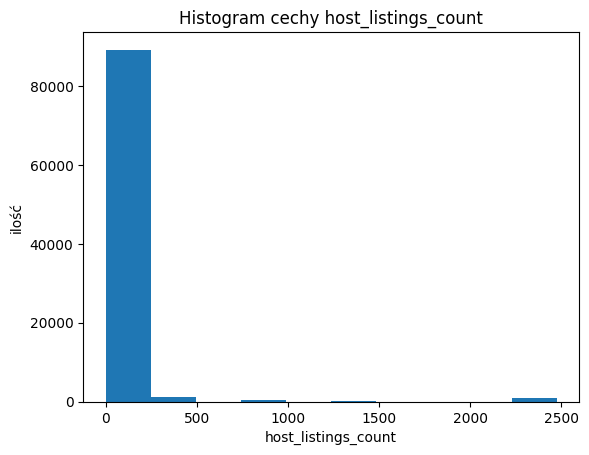

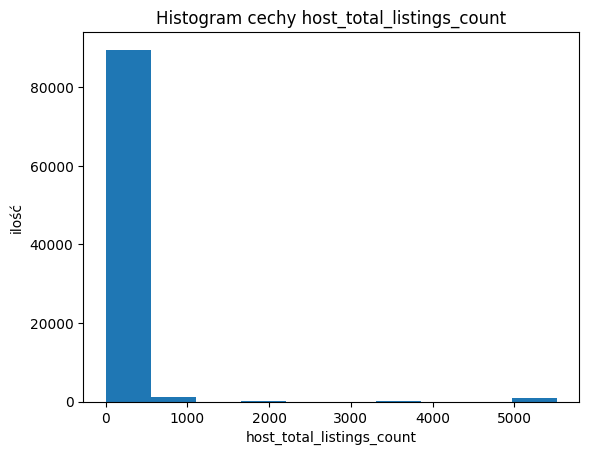

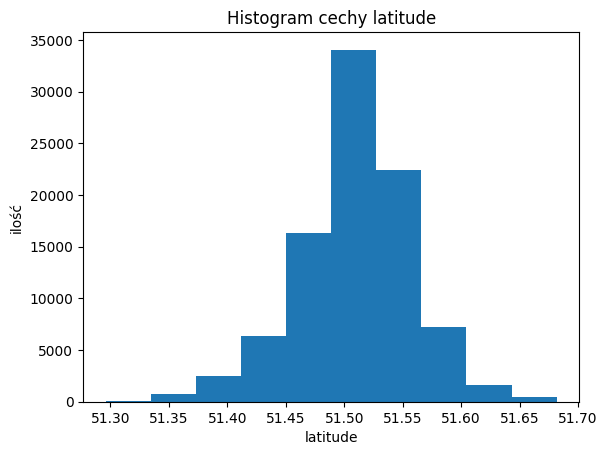

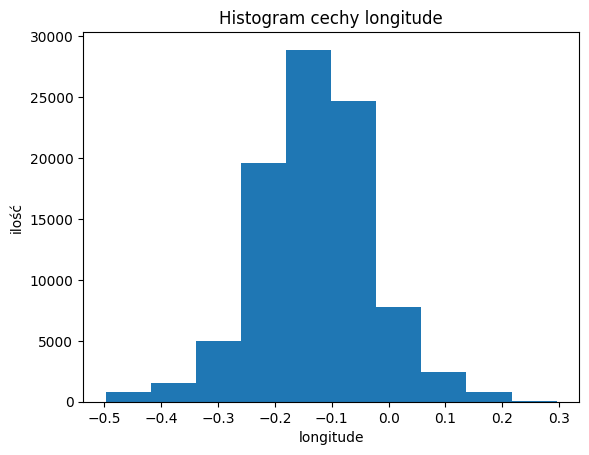

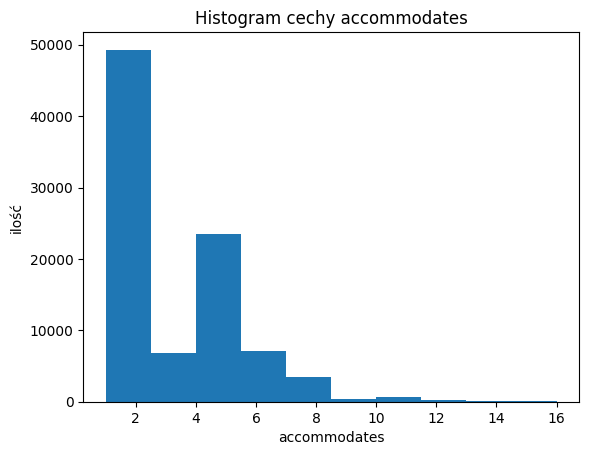

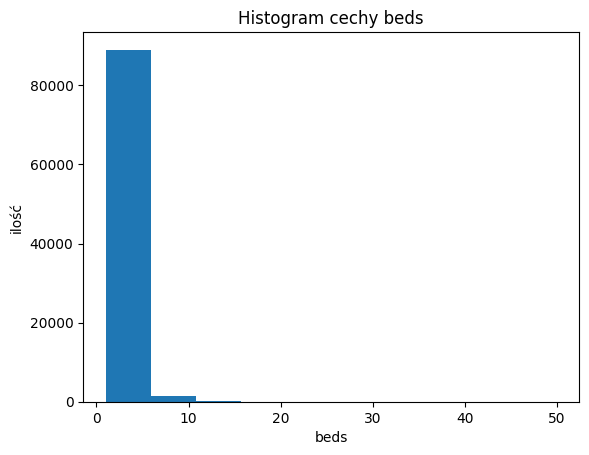

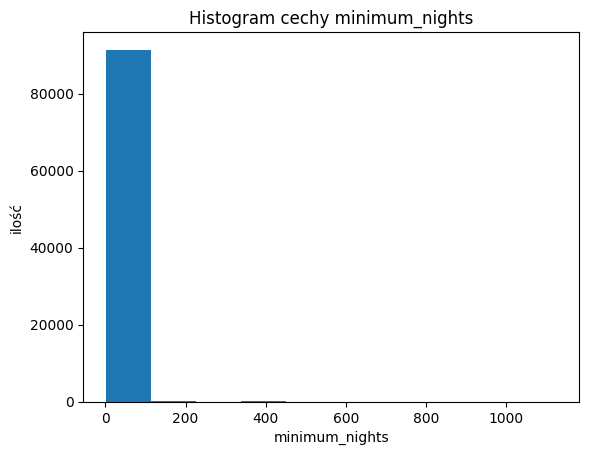

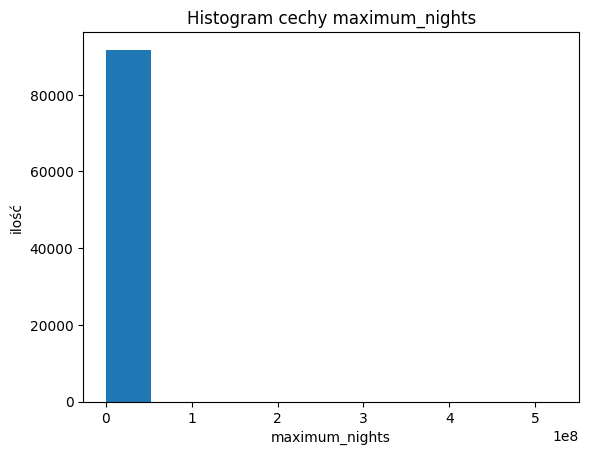

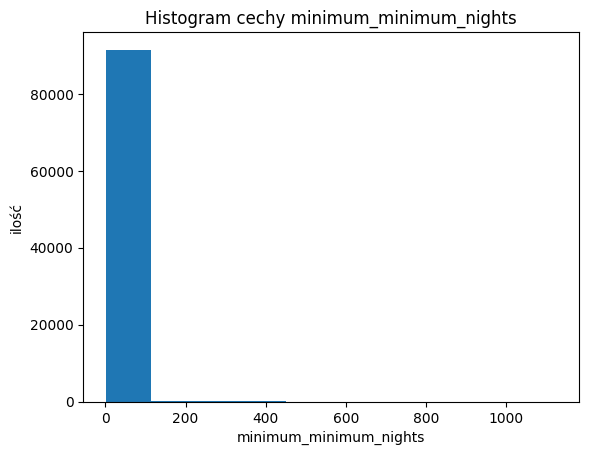

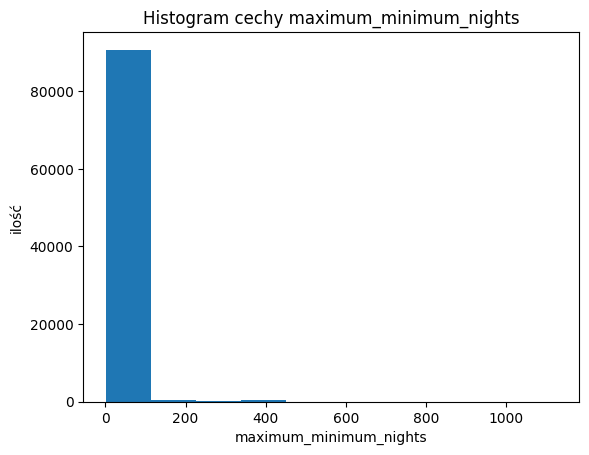

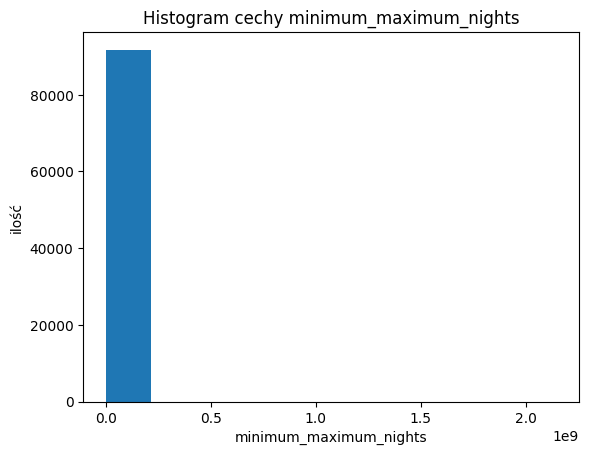

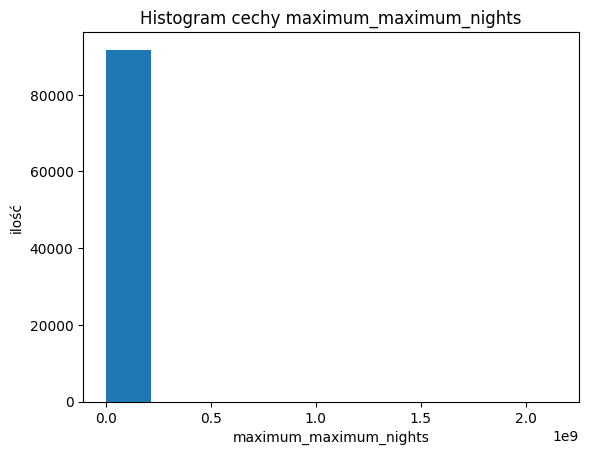

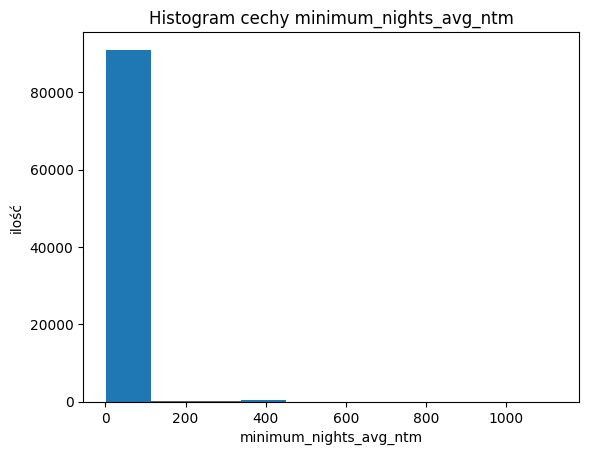

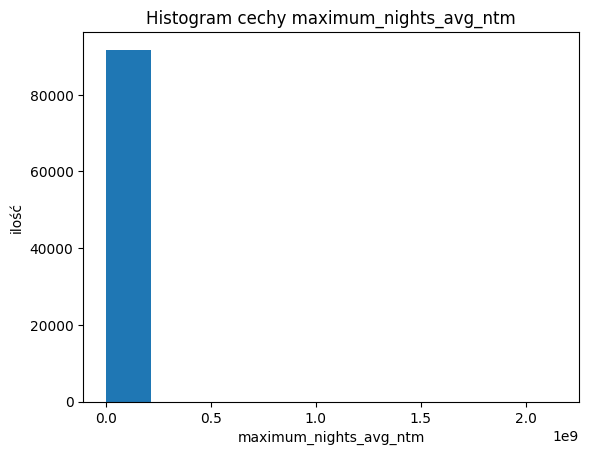

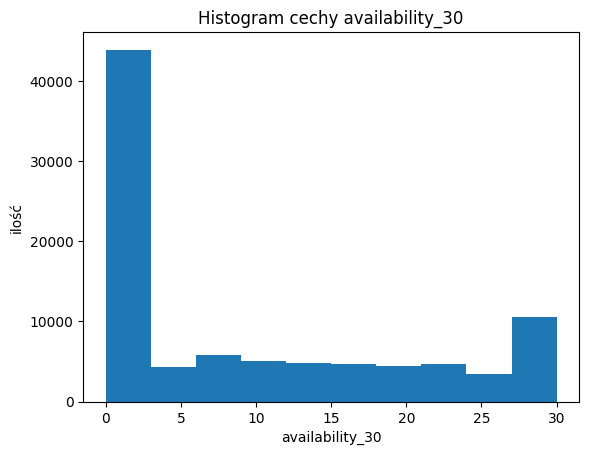

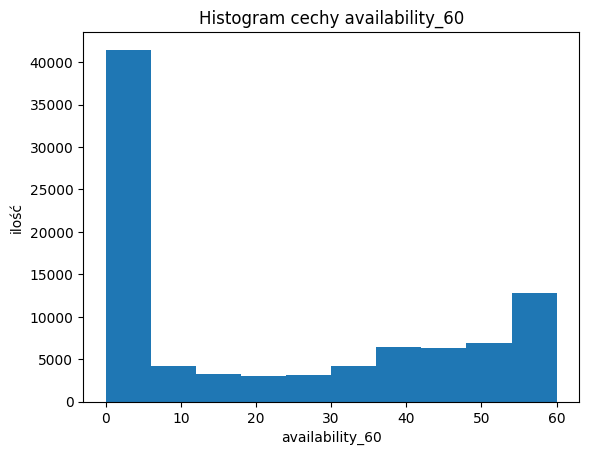

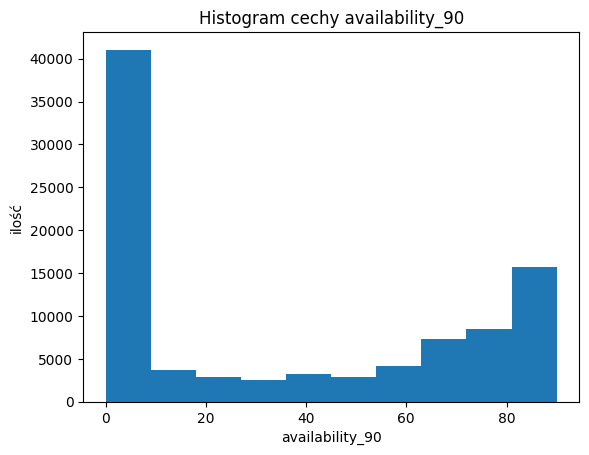

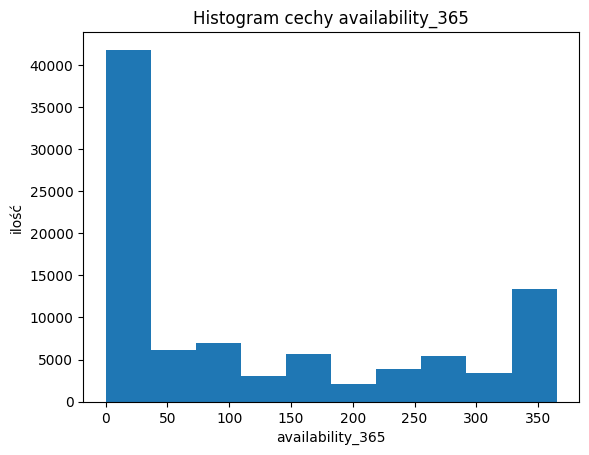

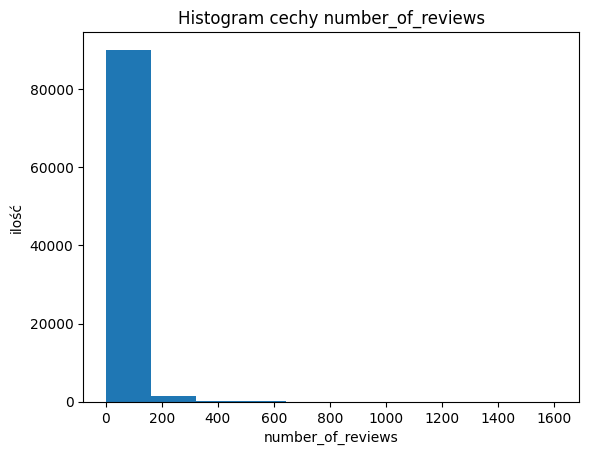

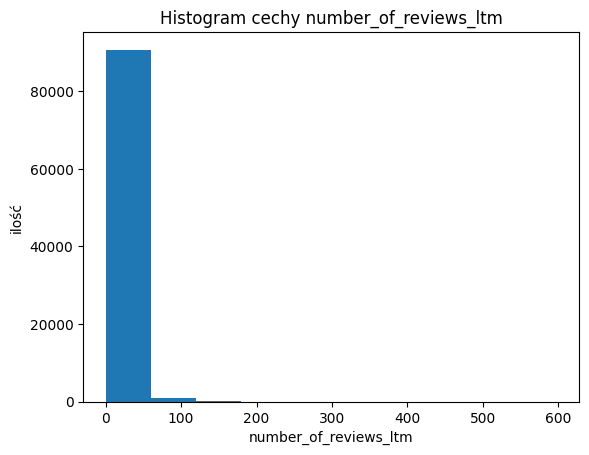

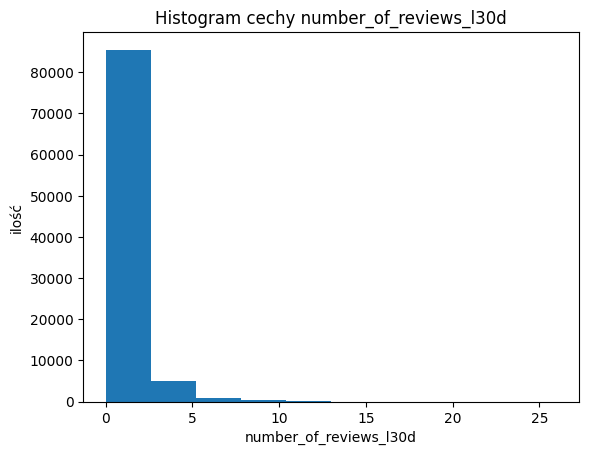

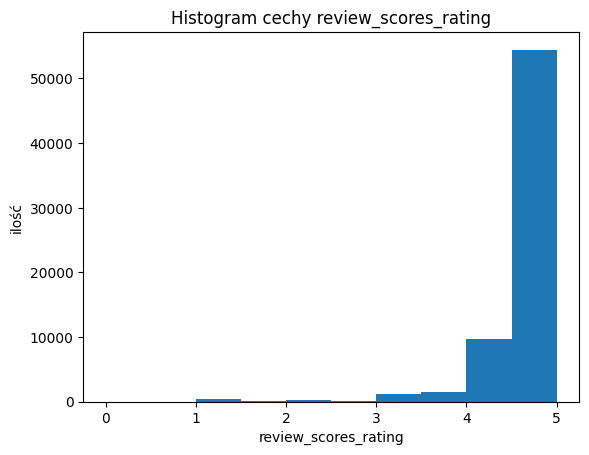

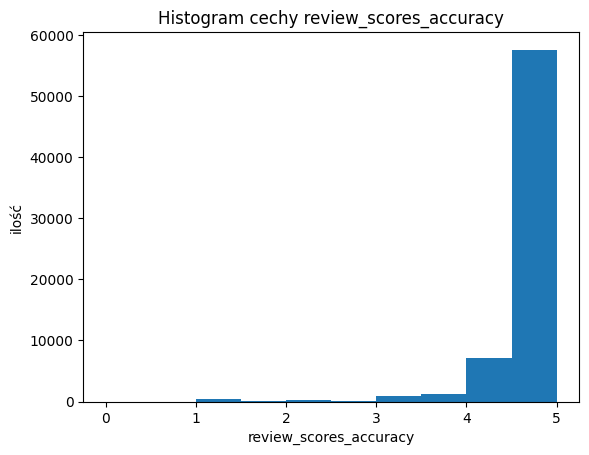

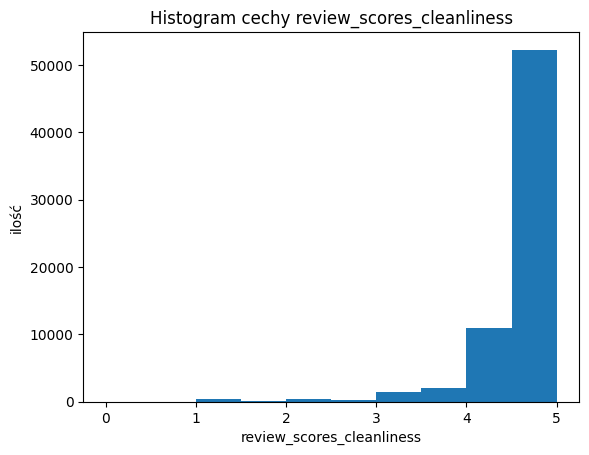

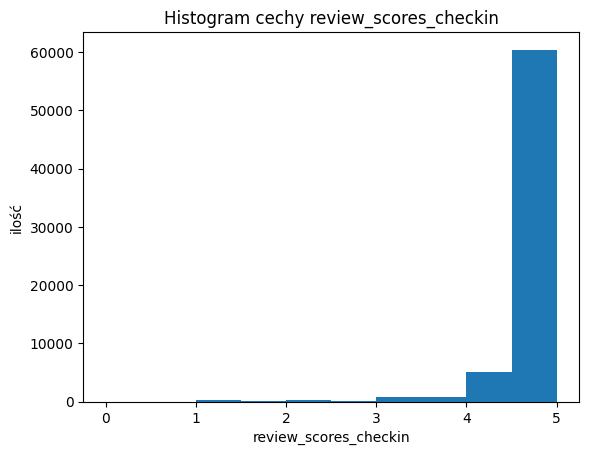

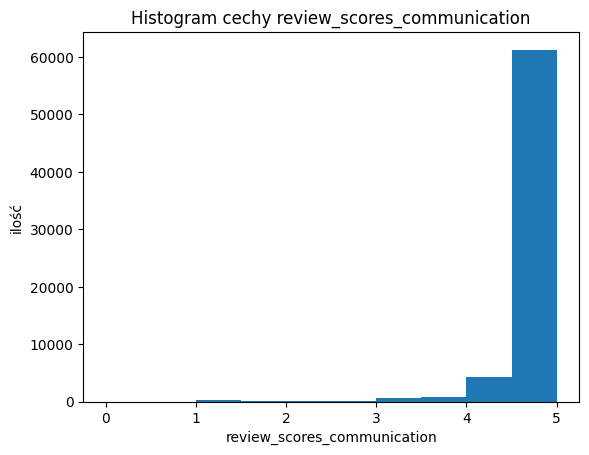

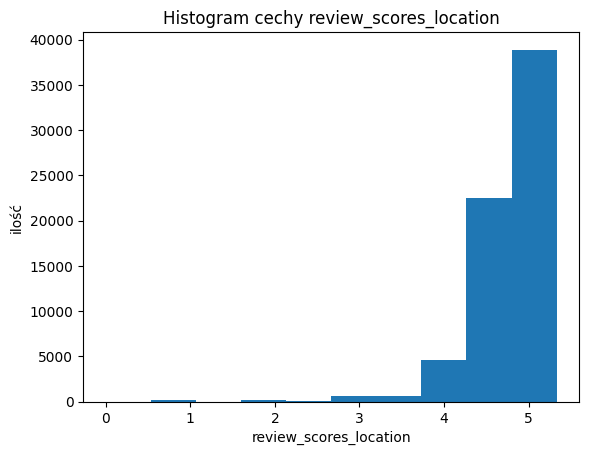

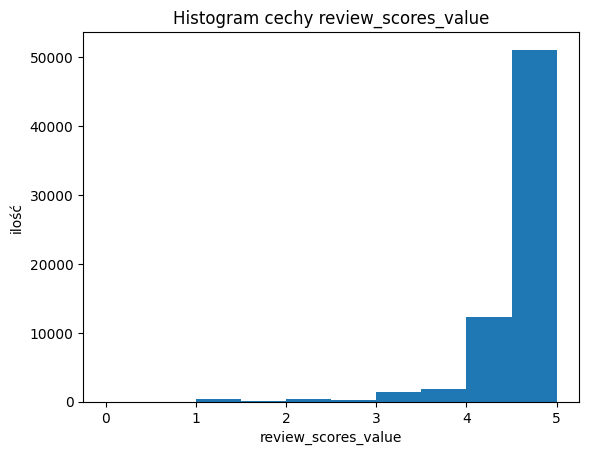

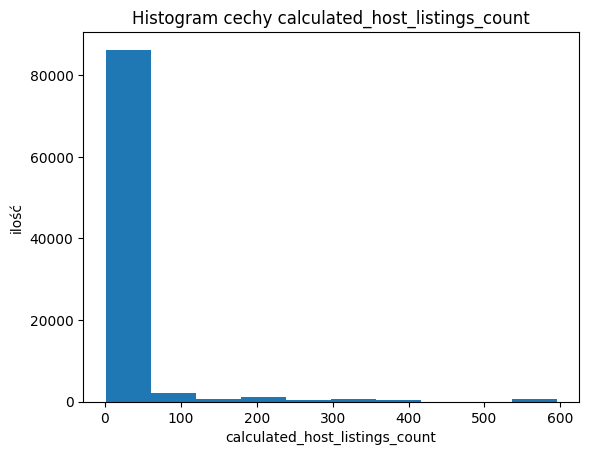

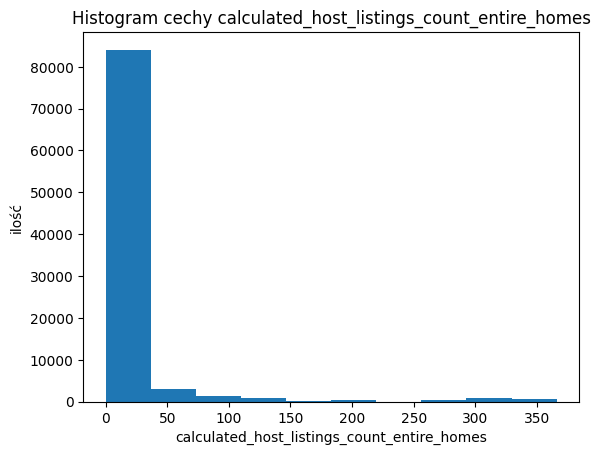

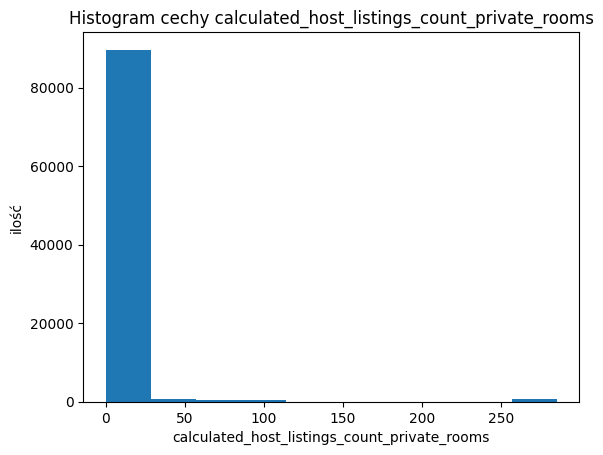

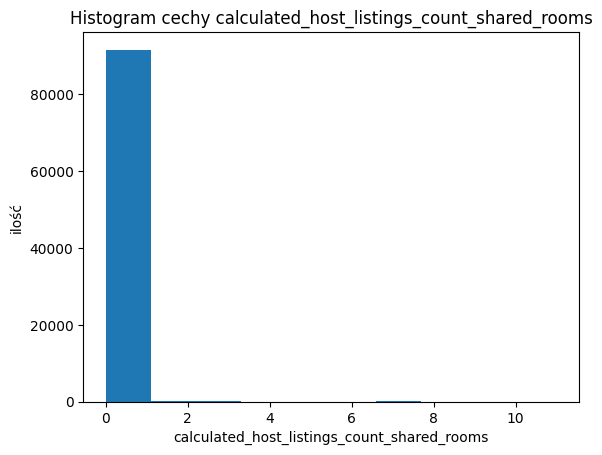

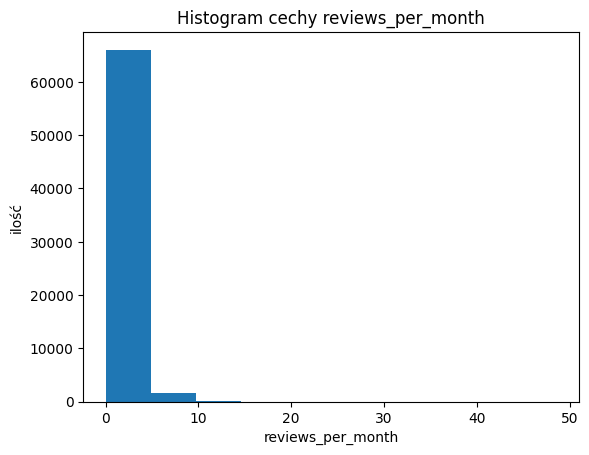

In [ ]:
# Histogramy dla wybranych zmiennych numerycznych
for feature in numerical:
  plt.hist(x=df[feature])
  plt.xlabel(f'{feature}')
  plt.ylabel('ilość')
  plt.title(f'Histogram cechy {feature}')
  plt.show()
  print('\n')

In [ ]:
# stworzenie stringa cech kategorycznych
features_cat = [x for x in df.select_dtypes(exclude=np.number).columns]
for idx, feature in enumerate(features_cat, start=1):
  print(f"'{feature}', ")

'listing_url', 
'last_scraped', 
'source', 
'name', 
'neighborhood_overview', 
'picture_url', 
'host_url', 
'host_name', 
'host_since', 
'host_location', 
'host_about', 
'host_response_time', 
'host_response_rate', 
'host_acceptance_rate', 
'host_is_superhost', 
'host_thumbnail_url', 
'host_picture_url', 
'host_neighbourhood', 
'host_verifications', 
'host_has_profile_pic', 
'host_identity_verified', 
'neighbourhood', 
'neighbourhood_cleansed', 
'property_type', 
'room_type', 
'bathrooms_text', 
'amenities', 
'price', 
'has_availability', 
'calendar_last_scraped', 
'first_review', 
'last_review', 
'instant_bookable', 


In [ ]:
# zmienne kategoryczne - wybrane (niepotrzebne zostały usunięte)
categorical = [# 'listing_url', - nieważne
'last_scraped',
'source',
# 'name', - nieważne
# 'neighborhood_overview', - nieważne
# 'picture_url', - nieważne
# 'host_url', - nieważne
# 'host_name', - nieważne
'host_since',
# 'host_location', - nieważne
# 'host_about', - nieważne
'host_response_time',
'host_response_rate',
'host_acceptance_rate',
'host_is_superhost',
# 'host_thumbnail_url', - nieważne
# 'host_picture_url', - nieważne
# 'host_neighbourhood', - nieważne
'host_verifications',
'host_has_profile_pic',
'host_identity_verified',
# 'neighbourhood', - lepiej wziąć neighbourhood_cleansed
'neighbourhood_cleansed',
'property_type',
'room_type',
'bathrooms_text',
# 'amenities', - puste
'price',
'has_availability',
'calendar_last_scraped',
'first_review',
'last_review',
'instant_bookable']

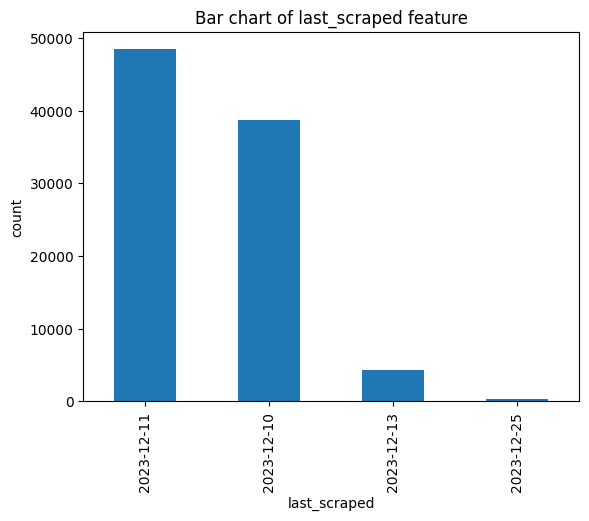

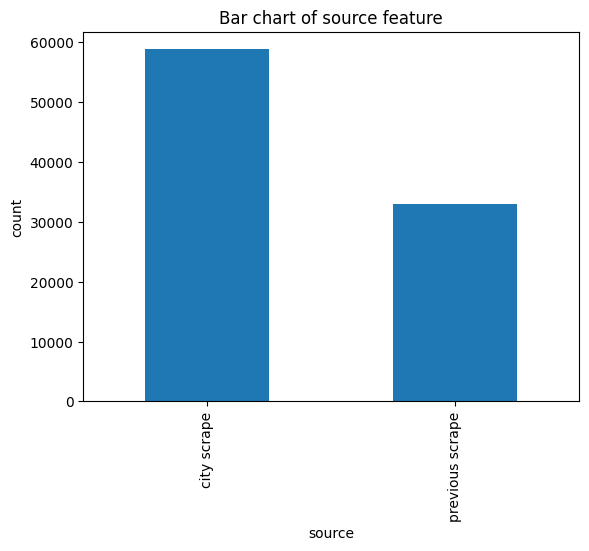

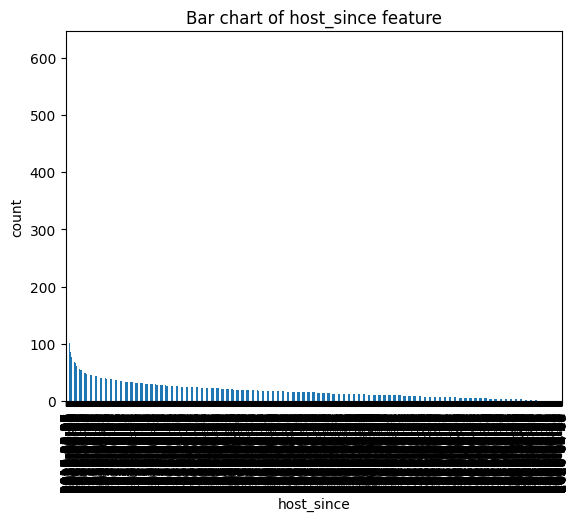

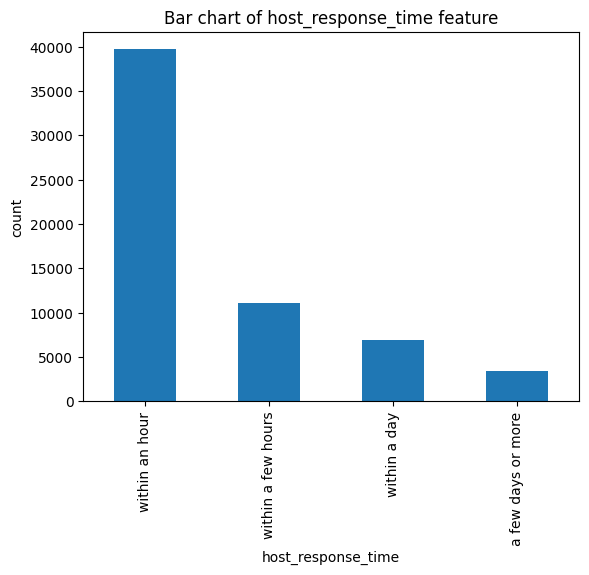

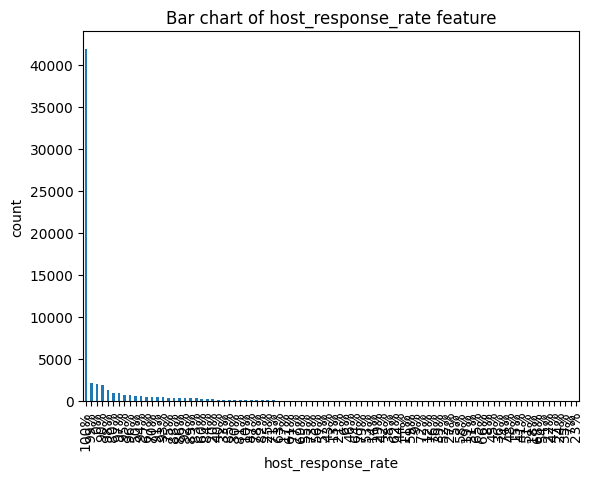

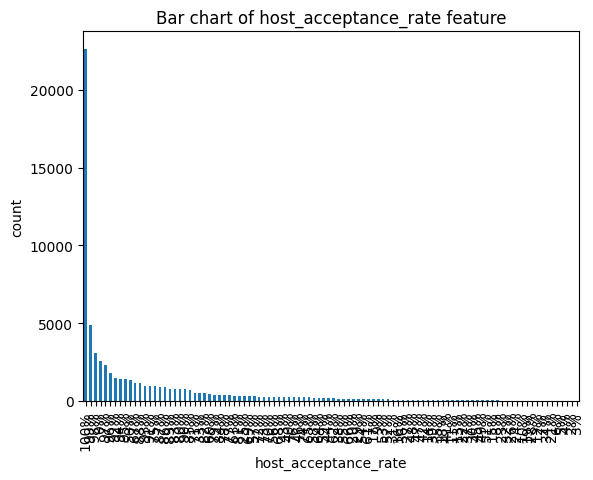

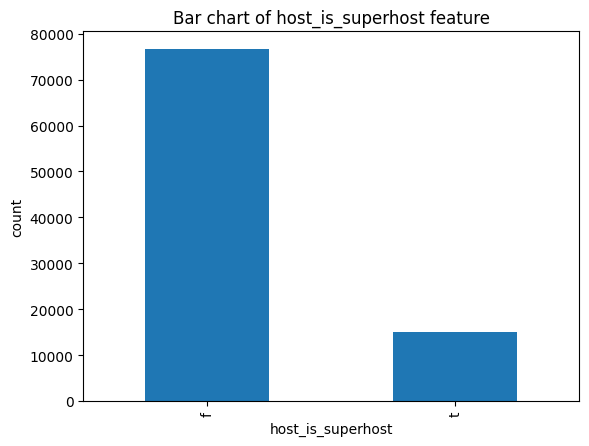

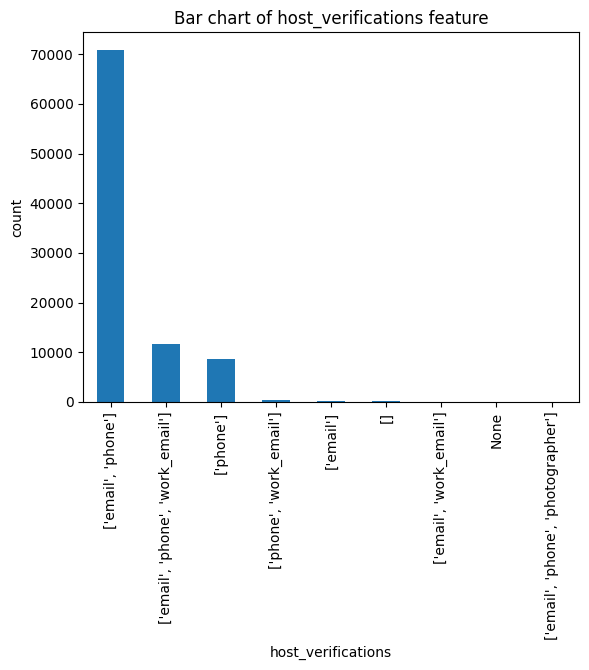

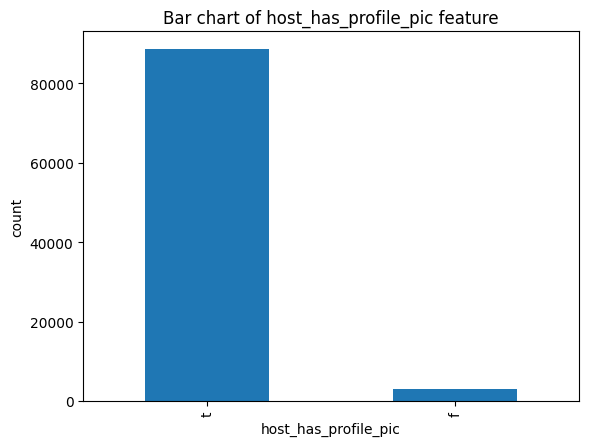

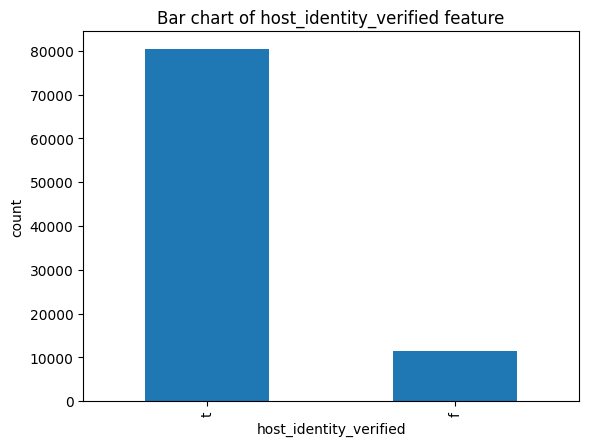

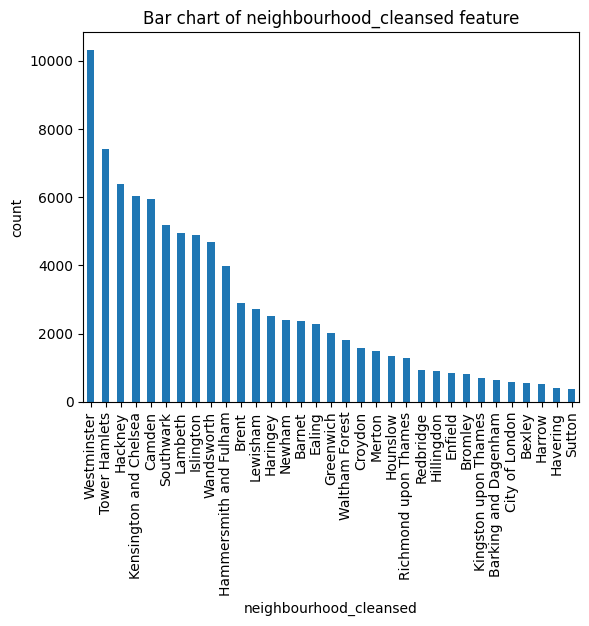

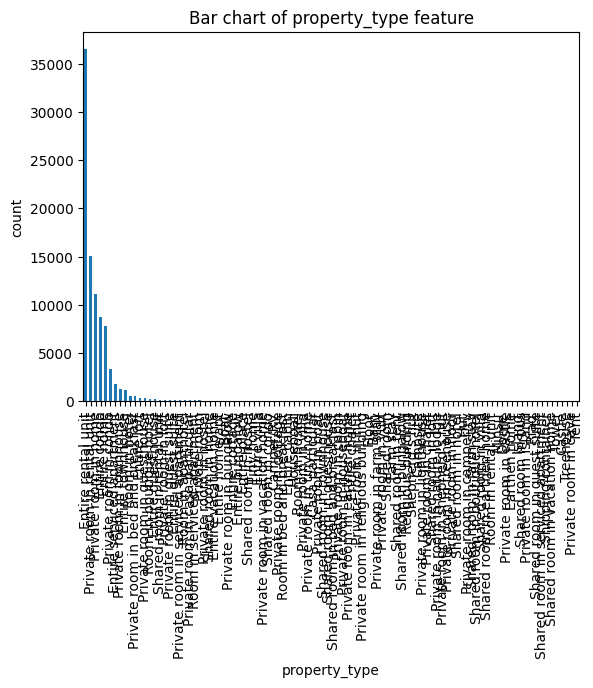

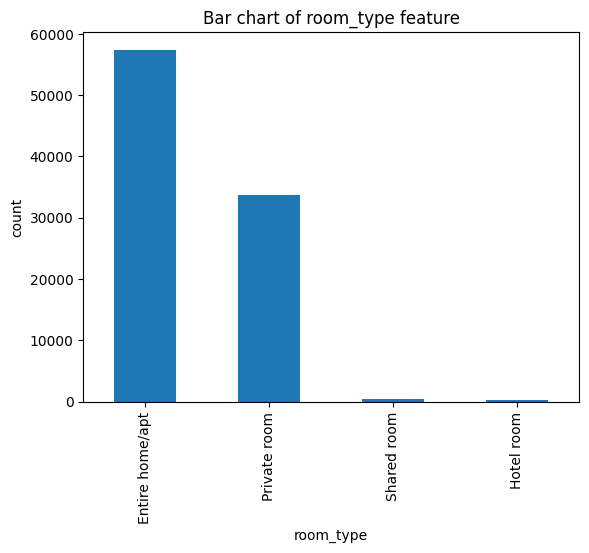

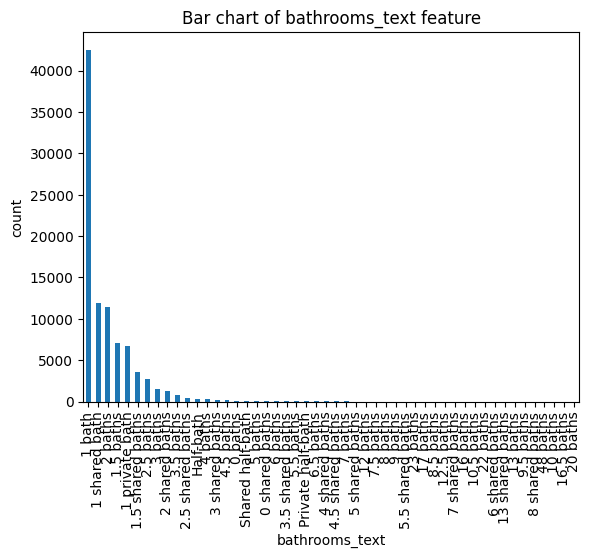

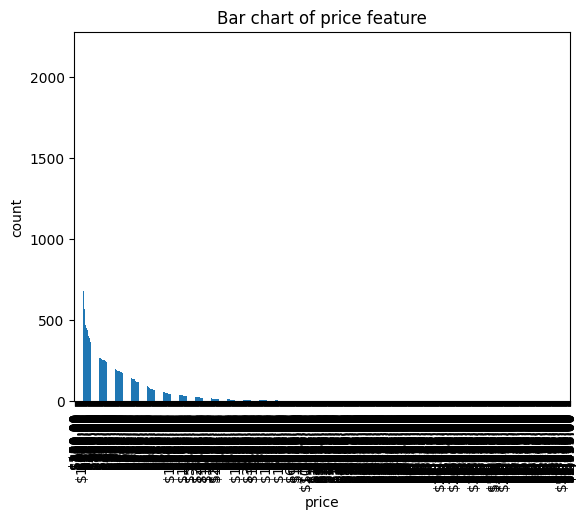

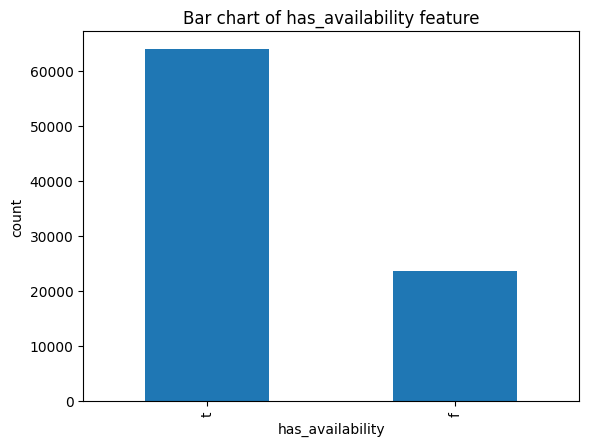

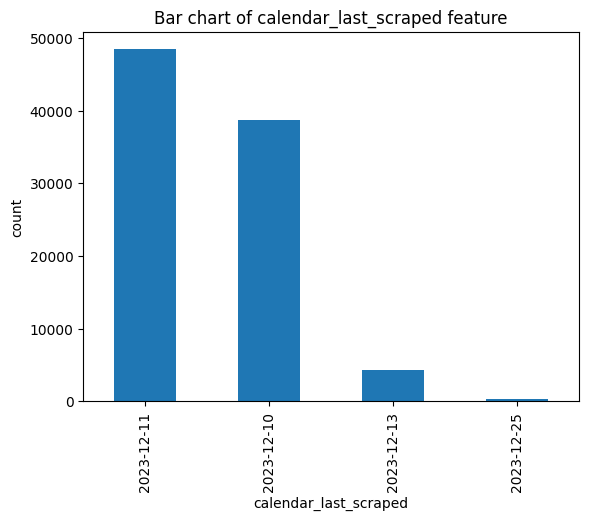

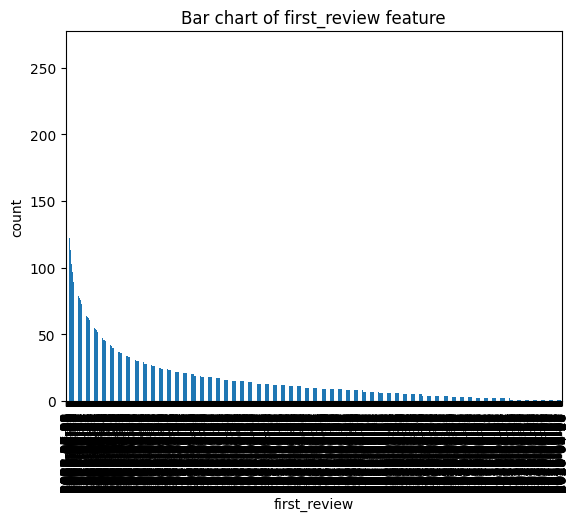

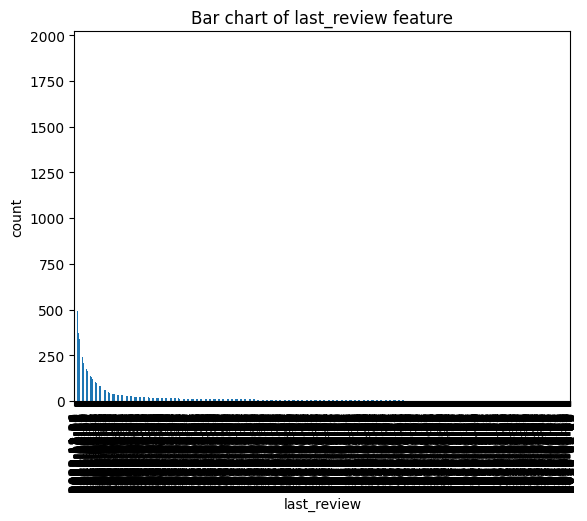

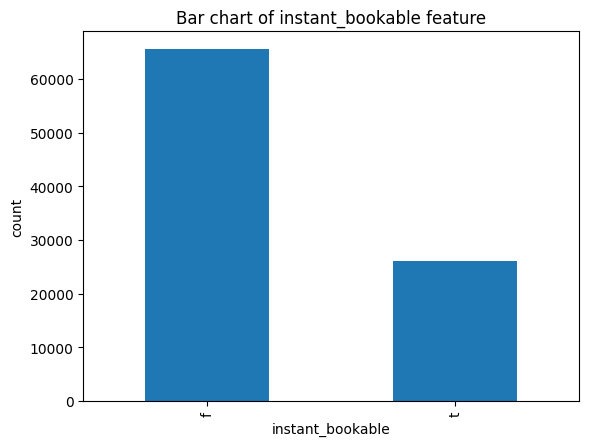

In [ ]:
# Bar charty dla wybranych zmiennych kategorycznych
for feature in categorical:
  df[feature].value_counts().plot(kind='bar')
  plt.xlabel(f'{feature}')
  plt.ylabel('count')
  plt.title(f'Bar chart of {feature} feature')
  plt.show()
  print('\n')

**Podsumowanie braków danych**:  

Zmienne numeryczne:  
* puste kolumny: description, neighbourhood_cleansed, calendar_updated, license, bedrooms - dane mogą być usunięte
* pusta kolumna: bathrooms - można uzupełnić przez bathrooms_text
* kolumny nieważne do analizy: scrape_id, host_id
* pojawiają się outliery dla niektórych zmiennych
* pojawiają się dane skośne

Zmienne kategoryczne:
* wiele kolumn nieważnych do analizy - głównie url lub opisy
* daty: last_scraped, calendar_last_scraped, host_since, first_review, last_review - trzeba przekształcić na daty
* dane procentowe: host_response_rate, host_acceptance rate - można przekształcić na ułamki
* dane t/f: host_is_superhost, host_has_profile_pic, instant_bookable, host_identity_verified, has_availability - przekształcić t/f na 1/0
* dane tabelaryczne: host_verifications - można przekształcić format zapisu
* price trzeba przekształcić na numeryczny
* dane o nie za dużej ilości kategorii trzeba zamienić z object na category

## 8.
Przeprowadzenie czyszczenia danych, obejmujące m.in.:  
a. uzupełnienie brakujących danych (np. wartością stałą, średnią/medianą/modą dla całego zbioru lub dla podzbiorów według kategorii, poprzez interpolację itp.), usunięcie wierszy/kolumn, zawierających zbyt wiele braków danych,  
b. przycięcie odstających wartości (ang. outliers) – pomocne będą m.in. takie techniki, jak wykres punktowy (gdzie nanosimy na obu osiach ten sam atrybut) lub wykres pudełkowy i ewentualna normalizacja danych numerycznych (metodą min-max lub Z-score) – niektóre algorytmy modelowania danych są wrażliwe na punkty odstające (np. metody regresji liniowej, korelacja Pearsona) czy różnice w zakresie zmienności poszczególnych atrybutów (niektóre algorytmy klasyfikacji bądź grupowania)

In [ ]:
# Usunięcie niepotrzebnych kolumn z największymi brakami w danych
df.drop([
    'description', # puste
    'neighbourhood_group_cleansed', # puste, zamiast tego można użyć neighbourhood_cleansed
    'license', # puste
    'calendar_updated', # puste
    'bedrooms', # nie ma skąd wziąć tej informacji
    'amenities' # puste tabele
    ], axis=1, inplace=True)

In [ ]:
df['bathrooms_text'].unique()

array(['1 shared bath', '1 private bath', '1.5 baths', '1 bath', nan,
       '3 baths', '1.5 shared baths', '2 baths', '3.5 baths', '2.5 baths',
       'Half-bath', '4 baths', '2.5 shared baths', '2 shared baths',
       '6.5 baths', '4.5 baths', '0 baths', '3 shared baths',
       'Shared half-bath', '5.5 baths', '5 baths', '0 shared baths',
       'Private half-bath', '7 baths', '3.5 shared baths', '6 baths',
       '5.5 shared baths', '4.5 shared baths', '5 shared baths',
       '12 baths', '4 shared baths', '48 baths', '8 baths', '12.5 baths',
       '13 baths', '10.5 baths', '16.5 baths', '10 baths', '7.5 baths',
       '7 shared baths', '9 baths', '8 shared baths', '17 baths',
       '9.5 baths', '8.5 baths', '23 baths', '16 baths',
       '13 shared baths', '6 shared baths', '22 baths', '20 baths'],
      dtype=object)

In [ ]:
# przetransformowanie bathrooms_text na bathrooms
df['bathrooms'] = df['bathrooms_text'].str.extract('([\d.]+)').astype(float)
df['bathrooms'] = np.where(df['bathrooms_text'] == 'Half-bath', 0.5, df['bathrooms'])

In [ ]:
# sprawdzenie czy jest wartość 0.5 oraz wartości NaN
df['bathrooms'].unique()

array([ 1. ,  1.5,  nan,  3. ,  2. ,  3.5,  2.5,  0.5,  4. ,  6.5,  4.5,
        0. ,  5.5,  5. ,  7. ,  6. , 12. , 48. ,  8. , 12.5, 13. , 10.5,
       16.5, 10. ,  7.5,  9. , 17. ,  9.5,  8.5, 23. , 16. , 22. , 20. ])

In [ ]:
# sprawdzenie ile jest wartości NaN
df['bathrooms'].isna().sum()

228

In [ ]:
# uzależnienie od siebie liczby łazienek i lokatorów:
# ile średnio jest łazienek na liczbę lokatorów
for i in range(1, (df['accommodates'].max()+1)):
  print('Dla liczby lokatorów: %d średnia liczba łazienek to: %.1f'
  % (i, df.loc[df['accommodates'] == i, 'bathrooms'].mean()))

Dla liczby lokatorów: 1 średnia liczba łazienek to: 1.2
Dla liczby lokatorów: 2 średnia liczba łazienek to: 1.1
Dla liczby lokatorów: 3 średnia liczba łazienek to: 1.1
Dla liczby lokatorów: 4 średnia liczba łazienek to: 1.4
Dla liczby lokatorów: 5 średnia liczba łazienek to: 1.6
Dla liczby lokatorów: 6 średnia liczba łazienek to: 1.8
Dla liczby lokatorów: 7 średnia liczba łazienek to: 2.1
Dla liczby lokatorów: 8 średnia liczba łazienek to: 2.3
Dla liczby lokatorów: 9 średnia liczba łazienek to: 2.5
Dla liczby lokatorów: 10 średnia liczba łazienek to: 2.9
Dla liczby lokatorów: 11 średnia liczba łazienek to: 2.5
Dla liczby lokatorów: 12 średnia liczba łazienek to: 3.2
Dla liczby lokatorów: 13 średnia liczba łazienek to: 2.7
Dla liczby lokatorów: 14 średnia liczba łazienek to: 3.2
Dla liczby lokatorów: 15 średnia liczba łazienek to: 4.3
Dla liczby lokatorów: 16 średnia liczba łazienek to: 4.2


In [ ]:
# Wypełnienie brakujących wartości bathrooms średnią dla odpowiedniej liczby lokatorów
for i in range(1, (df['accommodates'].max() + 1)):
    df.loc[df['accommodates'] == i, 'bathrooms'] = df.loc[df['accommodates'] == i, 'bathrooms'].fillna(
        df.loc[df['accommodates'] == i, 'bathrooms'].mean())

In [ ]:
# sprawdzenie czy są wartości NaN
df['bathrooms'].isna().sum()

0

In [ ]:
# dane 't'/'f'
df[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']].head(3)

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
id,,,,,
198258,f,t,t,t,f
33332,f,t,f,t,f
42010,t,t,t,t,t


In [ ]:
# zamiana t/f na 1/0, zakładając, że jeśli NaN to f
mapping_func = {'t' : 1, 'f' : 0}
kolumnytf = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
df[kolumnytf] = df[kolumnytf].applymap(lambda x: mapping_func.get(x, 0)).astype(bool)

In [ ]:
df[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']].head(3)

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
id,,,,,
198258,False,True,True,True,False
33332,False,True,False,True,False
42010,True,True,True,True,True


In [ ]:
# sprawdzenie czy są wartości NaN
df[kolumnytf].isna().sum().sum()

0

In [ ]:
# wartości procentowe
df[['host_response_rate', 'host_acceptance_rate']].tail(5)

,host_response_rate,host_acceptance_rate
id,,
950589815013504257,100%,72%
951178246905249947,100%,100%
951188392382129035,100%,95%
951192793768996976,0%,0%
952607914901368427,100%,99%


In [ ]:
# zamiana wartości procentowych na zakres 0-1
kolumnypr = ['host_response_rate', 'host_acceptance_rate']
df[kolumnypr] = df[kolumnypr].apply(lambda x: x.str.replace('%','').astype(float) / 100)

In [ ]:
df[['host_response_rate', 'host_acceptance_rate']].tail(5)

,host_response_rate,host_acceptance_rate
id,,
950589815013504257,1.00,0.72
951178246905249947,1.00,1.00
951188392382129035,1.00,0.95
951192793768996976,0.00,0.00
952607914901368427,1.00,0.99


In [ ]:
# sprawdzenie czy są wartości NaN
df[['host_response_rate', 'host_acceptance_rate']].isna().sum()

host_response_rate      30673
host_acceptance_rate    25693
dtype: int64

In [ ]:
df[kolumnypr].describe()

,host_response_rate,host_acceptance_rate
count,61105.00,66085.00
mean,0.92,0.84
std,0.22,0.26
min,0.00,0.00
25%,0.97,0.78
50%,1.00,0.96
75%,1.00,1.00
max,1.00,1.00


In [ ]:
# zamiana danych wartościami średnimi
df['host_response_rate'].fillna(round(df['host_response_rate'].mean(), 2), inplace=True)
df['host_acceptance_rate'].fillna(round(df['host_acceptance_rate'].mean(), 2), inplace=True)

In [ ]:
# sprawdzenie czy są wartości NaN
df[['host_response_rate', 'host_acceptance_rate']].isna().sum()

host_response_rate      0
host_acceptance_rate    0
dtype: int64

In [ ]:
# dane, które są datą
kolumnydat = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']
df[kolumnydat].head(3)

,last_scraped,host_since,calendar_last_scraped,first_review,last_review
id,,,,,
198258,2023-12-10,2011-08-14,2023-12-10,2011-08-22,2023-03-16
33332,2023-12-10,2010-06-14,2023-12-10,2010-10-16,2022-08-01
42010,2023-12-10,2010-07-04,2023-12-10,2010-09-22,2023-12-03


In [ ]:
# jakiego typu są te daty?
df[kolumnydat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91778 entries, 198258 to 952607914901368427
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   last_scraped           91778 non-null  object
 1   host_since             91773 non-null  object
 2   calendar_last_scraped  91778 non-null  object
 3   first_review           67655 non-null  object
 4   last_review            67655 non-null  object
dtypes: object(5)
memory usage: 4.2+ MB


In [ ]:
# zamiana typu na datetime
df[kolumnydat] = df[kolumnydat].apply(pd.to_datetime)

In [ ]:
# sprawdzenie typu
df[kolumnydat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91778 entries, 198258 to 952607914901368427
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   last_scraped           91778 non-null  datetime64[ns]
 1   host_since             91773 non-null  datetime64[ns]
 2   calendar_last_scraped  91778 non-null  datetime64[ns]
 3   first_review           67655 non-null  datetime64[ns]
 4   last_review            67655 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 4.2 MB


In [ ]:
# sprawdzenie czy są wartości NaN
df[kolumnydat].isna().sum()

last_scraped                 0
host_since                   5
calendar_last_scraped        0
first_review             24123
last_review              24123
dtype: int64

In [ ]:
df[['host_since', 'first_review', 'last_review']].describe(datetime_is_numeric=True)

,host_since,first_review,last_review
count,91773,67655,67655
mean,2017-04-10 00:31:01.253309696,2020-09-30 07:44:46.045377536,2022-06-23 09:24:36.768901120
min,2008-12-03 00:00:00,2009-12-21 00:00:00,2011-07-02 00:00:00
25%,2014-11-01 00:00:00,2018-06-20 12:00:00,2022-03-26 00:00:00
50%,2016-07-20 00:00:00,2021-12-17 00:00:00,2023-08-28 00:00:00
75%,2019-07-26 00:00:00,2023-05-05 00:00:00,2023-11-18 00:00:00
max,2023-12-08 00:00:00,2023-12-22 00:00:00,2023-12-24 00:00:00


In [ ]:
# dane wypełniamy średnią
df['host_since'].fillna(df['host_since'].mean(), inplace=True)
df['first_review'].fillna(df['first_review'].mean(), inplace=True)
df['last_review'].fillna(df['last_review'].mean(), inplace=True)

In [ ]:
# sprawdzenie czy nadal są wartości NaN
df[kolumnydat].isna().sum()

last_scraped             0
host_since               0
calendar_last_scraped    0
first_review             0
last_review              0
dtype: int64

In [ ]:
# zmiana ceny na float
df['price'] = df['price'].str.replace('[$,]','', regex=True).astype(float)

In [ ]:
# sprawdzenie czy są wartości NaN
df['price'].isna().sum()

4180

In [ ]:
df['price'].describe()

count   87598.00
mean      182.14
std       394.01
min         1.00
25%        65.00
50%       115.00
75%       196.00
max     53588.00
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

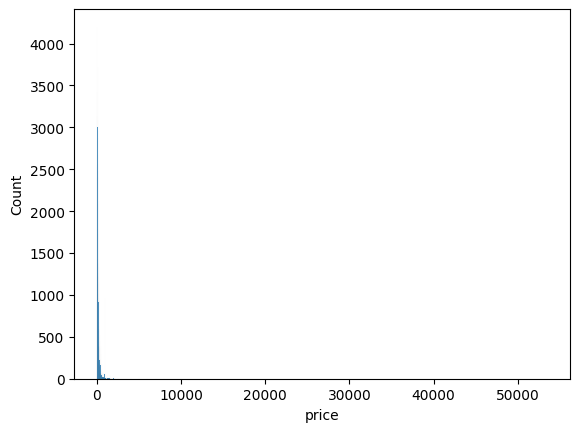

In [ ]:
sns.histplot(x = df['price'])

In [ ]:
# są wyraźne outliery - dlatego trzeba zobaczyć w jakim przedziale znajduje się 95% wartości
# a do tego potrzebne jest chwilowe odfiltrowanie danych brakujących
filtered = df[~np.isnan(df['price'])]['price']
perc = np.percentile(filtered, 95)
print('95% wartości price znajduje się w przedziale do: {0:.2f}'.format(perc))

95% wartości price znajduje się w przedziale do: 500.00


In [ ]:
# usunięcie outlierów z ceny do 95% uprzedniej wartości
df = df[df['price'] < perc]

In [ ]:
# sprawdzenie czy są wartości NaN
# jak widać po usunięciu outlierów wartości NaN zniknęły
df['price'].isna().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
scrape_id,83016.00,20231210055232.00,0.00,20231210055232.00,20231210055232.00,20231210055232.00,20231210055232.00,20231210055232.00
host_id,83016.00,165980169.32,178084289.54,4775.00,21243090.25,79642242.00,287839421.00,550101907.00
host_response_rate,83016.00,0.93,0.16,0.00,0.92,0.99,1.00,1.00
host_acceptance_rate,83016.00,0.84,0.22,0.00,0.84,0.86,1.00,1.00
host_listings_count,83015.00,22.05,128.72,1.00,1.00,2.00,6.00,2475.00
host_total_listings_count,83015.00,41.40,288.89,1.00,1.00,3.00,10.00,5516.00
latitude,83016.00,51.51,0.05,51.30,51.48,51.51,51.54,51.68
longitude,83016.00,-0.13,0.10,-0.50,-0.19,-0.12,-0.07,0.30
accommodates,83016.00,3.11,1.85,1.00,2.00,2.00,4.00,16.00
bathrooms,83016.00,1.30,0.61,0.00,1.00,1.00,1.50,48.00


In [ ]:
df.shape

(83016, 68)

In [ ]:
# Wartości puste w procentach dla wszystkich cech
df.loc[:, df_isna].isna().sum().sort_values(ascending=False) / len(df) * 100

host_neighbourhood            48.43
host_about                    47.83
neighborhood_overview         45.66
neighbourhood                 45.66
host_response_time            31.59
reviews_per_month             23.09
review_scores_value           23.09
review_scores_location        23.08
review_scores_checkin         23.08
review_scores_communication   23.05
review_scores_accuracy        23.05
review_scores_cleanliness     23.04
review_scores_rating          23.02
host_location                 20.80
beds                           1.22
bathrooms_text                 0.08
picture_url                    0.01
host_thumbnail_url             0.00
host_picture_url               0.00
host_listings_count            0.00
host_total_listings_count      0.00
host_name                      0.00
host_identity_verified         0.00
first_review                   0.00
host_acceptance_rate           0.00
host_is_superhost              0.00
host_since                     0.00
last_review                 

In [ ]:
# usuwanie kolumn, które mają za dużo braków a nie przenoszą ważnych informacji
df = df.drop([
    'host_neighbourhood',
    'host_about',
    'neighborhood_overview',
    'neighbourhood'
], axis=1)

In [ ]:
# usuwanie outlierów z wartości reviews_per_month - może usunie też inne outliery?
filtered = df[~np.isnan(df['reviews_per_month'])]['reviews_per_month']
perc = np.percentile(filtered, 98)
print('95% wartości price znajduje się w przedziale do: {0:.2f}'.format(perc))
df = df[df['reviews_per_month'] < perc]

95% wartości price znajduje się w przedziale do: 5.16


In [ ]:
# wypełnienie wartości host_response_time wartością najczęstszą
df['host_response_time'].mode()

0    within an hour
Name: host_response_time, dtype: object

In [ ]:
df['host_response_time'] = df['host_response_time'].fillna('within an hour')

In [ ]:
# przyjrzenie się wartościom host_verifications
df['host_verifications'].unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['phone']", "['email']", "['phone', 'work_email']",
       "['email', 'phone', 'photographer']", '[]',
       "['email', 'work_email']"], dtype=object)

In [ ]:
df['host_verifications'].mode()

0    ['email', 'phone']
Name: host_verifications, dtype: object

In [ ]:
# wypełnienie pustych nawiasów [] najczęstszą wartością
df["host_verifications"][df["host_verifications"] == "[]"] = "['email', 'phone']"

<ipython-input-64-3502776a7528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["host_verifications"][df["host_verifications"] == "[]"] = "['email', 'phone']"


In [ ]:
df['host_verifications'].unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['phone']", "['email']", "['phone', 'work_email']",
       "['email', 'phone', 'photographer']", "['email', 'work_email']"],
      dtype=object)

In [ ]:
# zamiana tekstu na tablicę
df['host_verifications'] = df['host_verifications'].apply(eval)

In [ ]:
# zamiana tablicy na tuple - dla dalszego przekształcenia na typ category
df['host_verifications'] = df['host_verifications'].apply(tuple)

In [ ]:
unique_elements = []
for element in df['host_verifications']:
    if element not in unique_elements:
        unique_elements.append(element)

print(unique_elements)

[('email', 'phone'), ('email', 'phone', 'work_email'), ('phone',), ('email',), ('phone', 'work_email'), ('email', 'phone', 'photographer'), ('email', 'work_email')]


In [ ]:
# Wartości puste w procentach dla wszystkich cech
df.loc[:, df_isna].isna().sum().sort_values(ascending=False) / len(df) * 100

host_location                 18.56
beds                           1.09
review_scores_value            0.08
review_scores_location         0.08
review_scores_checkin          0.08
bathrooms_text                 0.05
review_scores_communication    0.04
review_scores_accuracy         0.04
review_scores_cleanliness      0.02
picture_url                    0.01
maximum_nights_avg_ntm         0.00
maximum_maximum_nights         0.00
minimum_nights_avg_ntm         0.00
review_scores_rating           0.00
has_availability               0.00
first_review                   0.00
last_review                    0.00
maximum_minimum_nights         0.00
minimum_maximum_nights         0.00
price                          0.00
minimum_minimum_nights         0.00
host_name                      0.00
bathrooms                      0.00
host_identity_verified         0.00
host_has_profile_pic           0.00
host_total_listings_count      0.00
host_listings_count            0.00
host_picture_url            

In [ ]:
# jeśli host_location jest puste, to będzie wypełnione Londynem
df['host_location'].mode()

0    London, United Kingdom
Name: host_location, dtype: object

In [ ]:
df['host_location'] = df['host_location'].fillna('London, United Kingdom')

In [ ]:
df['host_location'].isna().sum()

0

In [ ]:
# jeśli host_location jest puste, to będzie wypełnione Londynem
df['bathrooms_text'].mode()

0    1 bath
Name: bathrooms_text, dtype: object

In [ ]:
df['bathrooms_text'] = df['bathrooms_text'].fillna('1 bath')

In [ ]:
df['bathrooms_text'].isna().sum()

0

In [ ]:
# usunięcie brakujących wartości picture_url
df = df.dropna(subset=['picture_url'])

In [ ]:
df['picture_url'].isna().sum()

0

In [ ]:
# Wartości puste w procentach dla wszystkich cech
df.loc[:, df_isna].isna().sum().sort_values(ascending=False) / len(df) * 100

beds                          1.09
review_scores_value           0.08
review_scores_location        0.08
review_scores_checkin         0.08
review_scores_communication   0.04
review_scores_accuracy        0.04
review_scores_cleanliness     0.02
picture_url                   0.00
maximum_nights_avg_ntm        0.00
minimum_maximum_nights        0.00
maximum_maximum_nights        0.00
minimum_nights_avg_ntm        0.00
last_review                   0.00
has_availability              0.00
first_review                  0.00
minimum_minimum_nights        0.00
review_scores_rating          0.00
maximum_minimum_nights        0.00
price                         0.00
host_name                     0.00
bathrooms_text                0.00
bathrooms                     0.00
host_identity_verified        0.00
host_has_profile_pic          0.00
host_total_listings_count     0.00
host_listings_count           0.00
host_picture_url              0.00
host_thumbnail_url            0.00
host_is_superhost   

In [ ]:
# wypełnienie pozostałych wartości odpowiadającymi im średnimi
features = ['beds', 'review_scores_value', 'review_scores_location', 'review_scores_checkin', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_cleanliness']

for feature in features:
    df[feature] = df.apply(lambda row: row[feature] if not pd.isna(row[feature]) else df[feature].mean(), axis=1)

In [ ]:
# sprawdzenie czy w df są jeszcze jakieś wartości nan
df.isna().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62554 entries, 198258 to 952607914901368427
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   62554 non-null  object        
 1   scrape_id                                     62554 non-null  int64         
 2   last_scraped                                  62554 non-null  datetime64[ns]
 3   source                                        62554 non-null  object        
 4   name                                          62554 non-null  object        
 5   picture_url                                   62554 non-null  object        
 6   host_id                                       62554 non-null  int64         
 7   host_url                                      62554 non-null  object        
 8   host_name                                     62

In [ ]:
# zmiana typów object w category - jeśli kategorii jest więcej niż 100, pozostawiamy obiekt
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() < 100:
        df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62554 entries, 198258 to 952607914901368427
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   listing_url                                   62554 non-null  object        
 1   scrape_id                                     62554 non-null  int64         
 2   last_scraped                                  62554 non-null  datetime64[ns]
 3   source                                        62554 non-null  category      
 4   name                                          62554 non-null  object        
 5   picture_url                                   62554 non-null  object        
 6   host_id                                       62554 non-null  int64         
 7   host_url                                      62554 non-null  object        
 8   host_name                                     62

## 9.
Zbadanie zależności pomiędzy zmiennymi – krok ten pozwoli odkryć związki pomiędzy poszczególnymi zmiennymi; informacje te mogą także zostać użyte, np. na etapie transformacji zmiennych lub do podjęcia decyzji, które zmienne wybrać do budowy modelu:  
a. obliczenie macierzy korelacji (można użyć współczynnika korelacji rang Spearmana lub współczynnika Pearsona) pomiędzy zmiennymi numerycznymi i zwizualizowanie ich za pomocą wykresów punktowych (ang. scatter plots) lub tzw. wykresów par zmiennych (ang. pairplots),  
b. ewentualne zbadanie zależności pomiędzy zmiennymi kategorycznymi (współczynnik V Cramméra) i zależności pomiędzy zmiennymi kategorycznymi i numerycznymi (współczynnik R modelu liniowego z jedną zmienną kategoryczną, która objaśnia zmienną numeryczną) oraz (podobnie jak powyżej) zwizualizowanie tych zależności w formie wykresów

In [ ]:
# macierz korelacji (współczynnik Pearsona)
df_num = df.select_dtypes(include=np.number)
corr_Pearson = round(df_num.corr(),2)

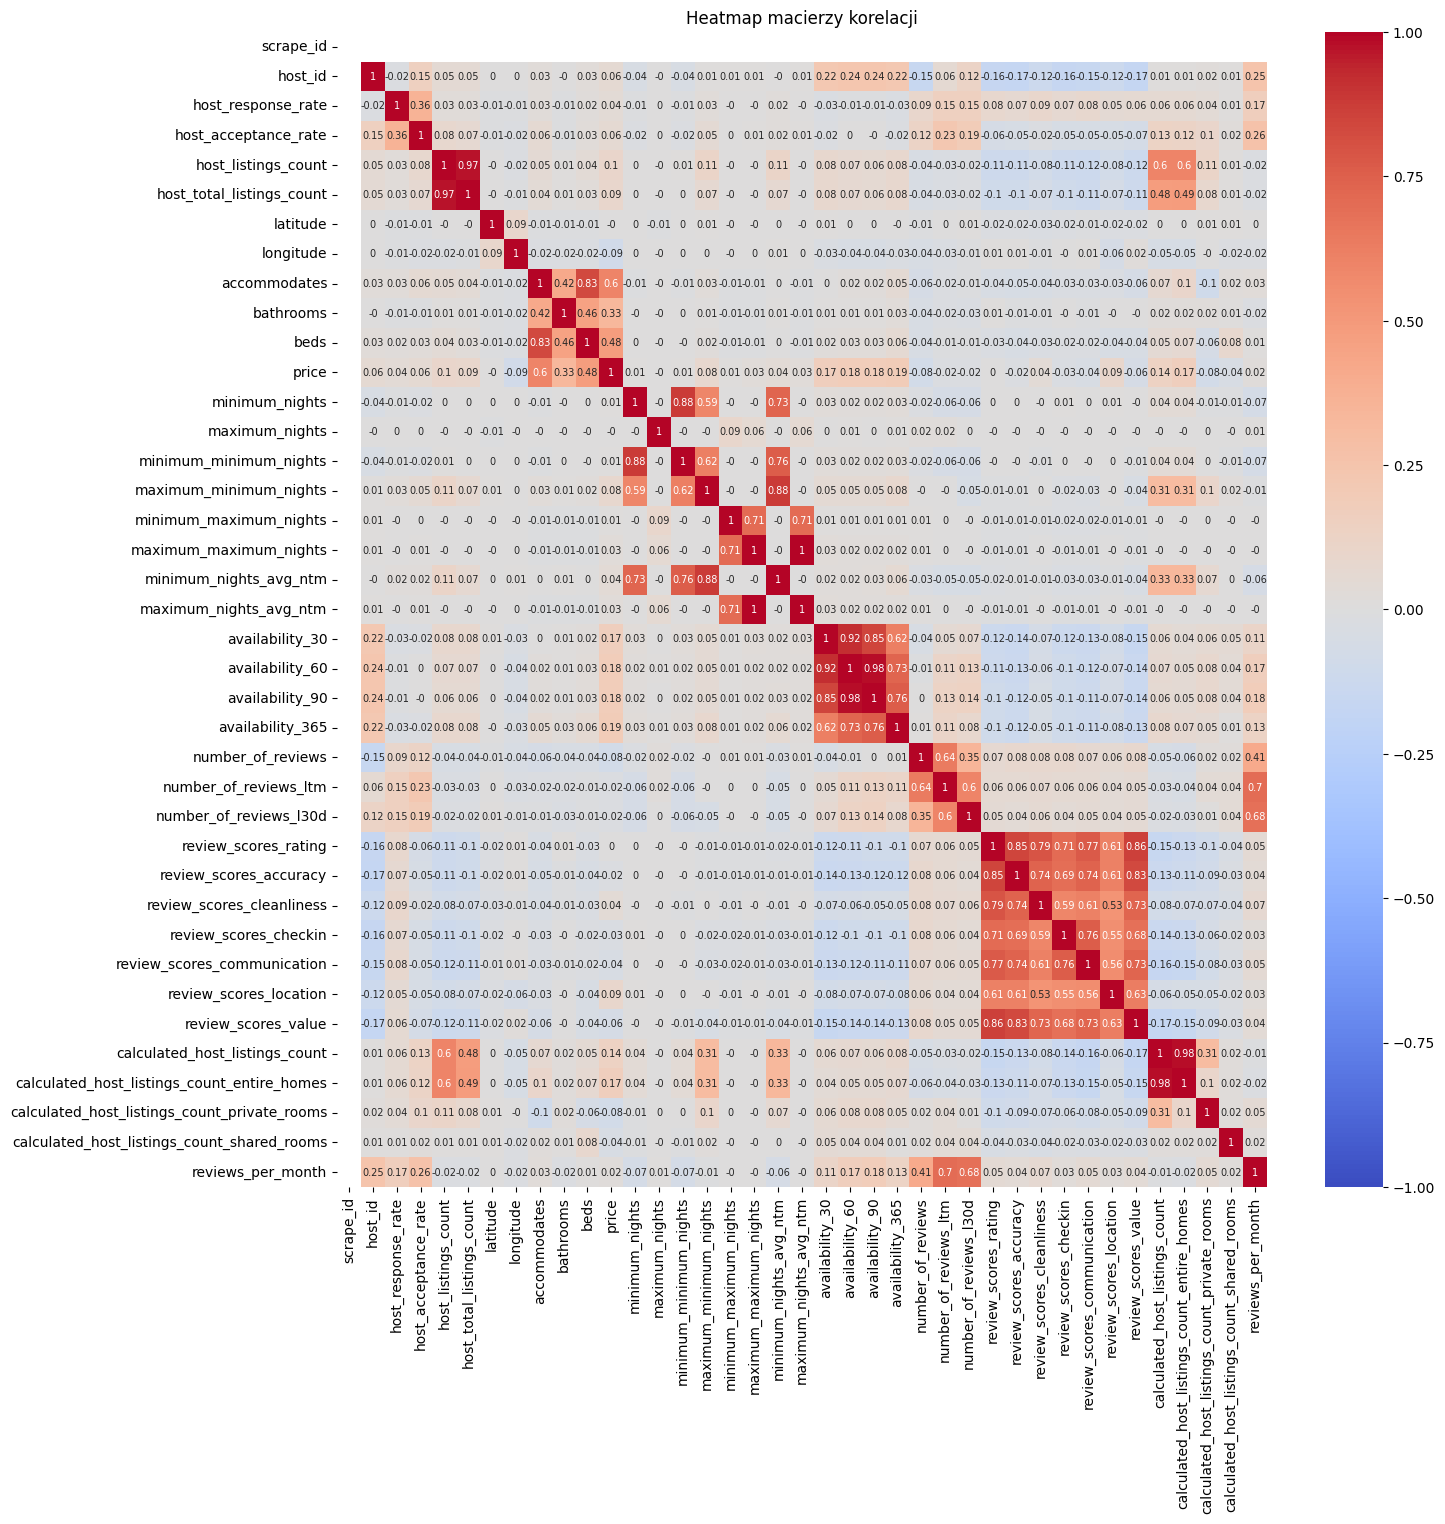

In [ ]:
# heatmapa korelacji
plt.figure(figsize=(15,15))
sns.heatmap(corr_Pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 7})
plt.title('Heatmap macierzy korelacji')
plt.show()

In [ ]:
# obliczanie współczynnika V Craméra
def cramers_V(var1,var2):
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape)-1
  return np.sqrt(stat/(obs*mini))

In [ ]:
# stworzenie tabeli i wyliczenie wartości
rows= []
df_cat = df.select_dtypes(include='category').drop('host_verifications', axis=1) # wybranie odpowiednich zmiennych - kategorie

for var1 in df_cat:
  col = []
  for var2 in df_cat:
    cramers =cramers_V(df_cat[var1], df_cat[var2])
    col.append(round(cramers,2))
  rows.append(col)

cramers_results = np.array(rows)
data = pd.DataFrame(cramers_results, columns = df_cat.columns, index =df_cat.columns)

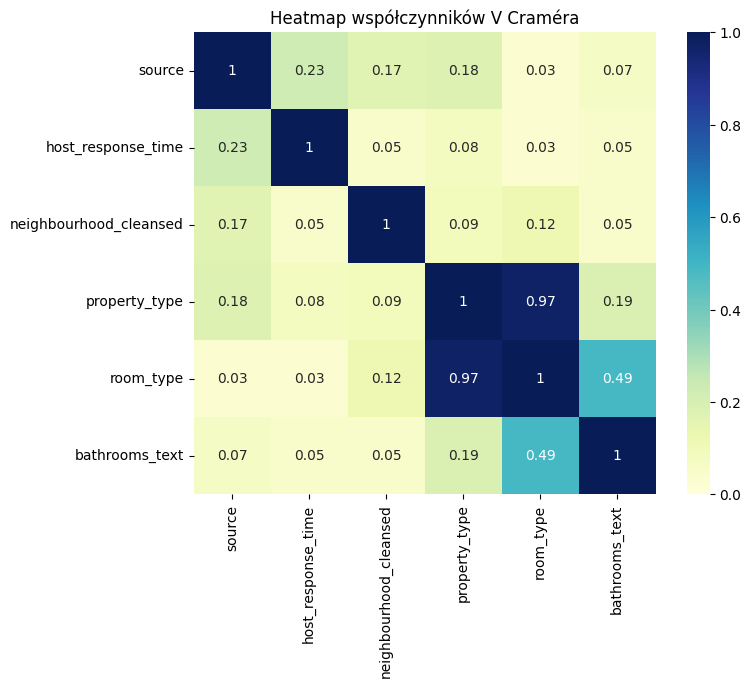

In [ ]:
# stworzenie wykresu
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap="YlGnBu", cbar=True, vmin=0., vmax=1, square=True)
plt.title("Heatmap współczynników V Craméra")
plt.show()

In [ ]:
# wyliczenie współczynników R^2 dla jednej zmiennej numerycznej i kategorycznej
r_sq = pd.DataFrame(index=df_num.columns, columns=df_cat.columns)

for num in df_num.columns:
    for cat in df_cat.columns:
        formula = f'{num} ~ C({cat})'
        model = sm.OLS.from_formula(formula, data=df).fit()
        r_sq.loc[num, cat] = model.rsquared

r_sq = round(r_sq.astype(float),2)

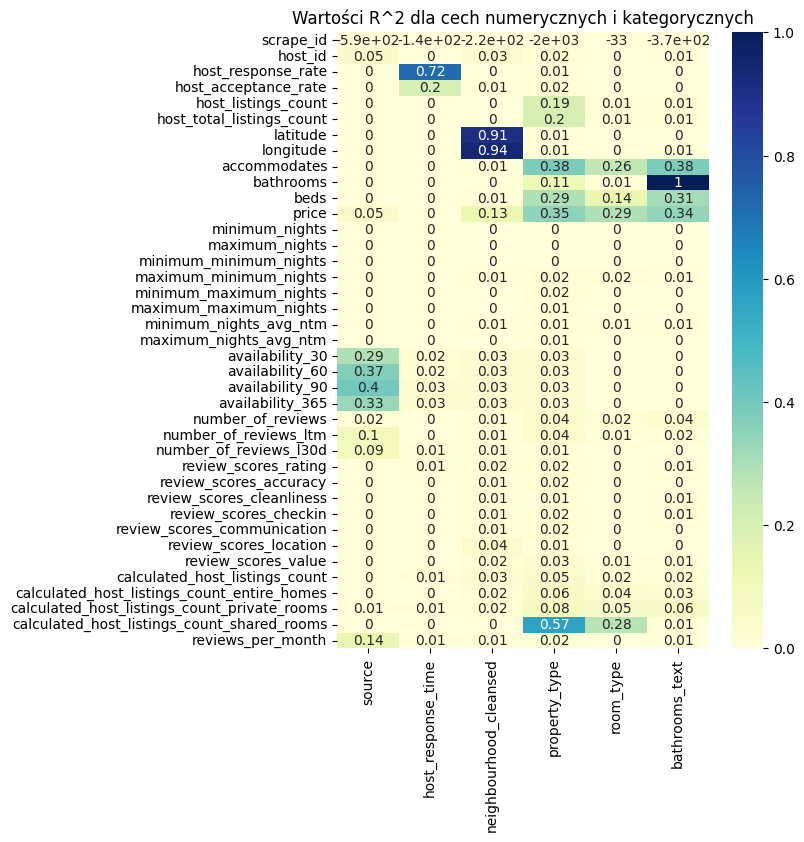

In [ ]:
# wygenerowanie heatmapy
plt.figure(figsize=(6, 8))
sns.heatmap(r_sq, annot=True, cmap="YlGnBu", cbar=True, vmin=0, vmax=1)
plt.title('Wartości R^2 dla cech numerycznych i kategorycznych')
plt.show()